In [1]:
import re
import numpy as np
import pandas as pd
import openpyxl

import geopandas as gpd
from shapely.geometry import Point
import geographiclib
from geographiclib.geodesic import Geodesic
import utm

import sys
import os
import requests
from bs4 import BeautifulSoup
from lxml import html
import warnings

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import urbanpy as up
import contextily as ctx

import io
import json

pd.set_option('display.max_rows',999)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


warnings.filterwarnings("ignore")
#import unicodedata
#import gzip

In [3]:
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py
import plotly

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## files

In [5]:
os.getcwd()

'c:\\Users\\Franco\\Python\\CAF\\Entregables\\Informes\\multiples'

In [6]:
direc = 'c:\\Users\\Franco\\Python\\CAF\\files\\clean'
files = os.listdir(direc)

In [9]:
files

['accesom.xlsx',
 'cwpops.xlsx',
 'dbiz.xlsx',
 'dbizi.xlsx',
 'distances.xlsx',
 'es.xlsx',
 'geom_air.xlsx',
 'laboral.xlsx',
 'mlab.xlsx',
 'mlabi.xlsx',
 'properati.xlsx',
 'properati_i.xlsx',
 'sectores.xlsx']

In [24]:
labor = pd.read_excel(direc+'\\laboral.xlsx',header=[0,1],index_col=[0,1])

In [25]:
sec = pd.read_excel(direc+'\\sectores.xlsx',index_col=[0,1])

In [12]:
cw = pd.read_excel(direc+'\\cwpops.xlsx',index_col=[0,1])

In [48]:
merge = cw.loc[(cw['pops']<5000000),:].loc[idx[['Argentina','Brasil','Colombia','Mexico','Chile','Peru','Ecuador'],:],:].join(labor.iloc[:,:5]).join(sec.iloc[:,:5])

In [142]:
merge = merge.drop(index=('Argentina','Ciudad de Buenos Aires'))

## Ciudades y Ciudades de Referencia

In [18]:
idx = pd.IndexSlice

In [175]:
mydict= {'Mexico':['Puebla-Tlaxcala','Merida','Culiacan','La Laguna'],
 'Argentina':['Gran Mendoza','Gran Cordoba','Neuquen-Plottier','Santiago del Estero-La Banda'],
 'Brasil':['Salvador','Fortaleza','Goiania','Curitiba'],
 'Colombia':['Armenia','Bucaramanga','Villavicencio','Santa Marta'],
 'Ecuador':['Esmeraldas'],
 'Chile':['Antofagasta'],
 'Peru':['Arequipa -area metropolitana','Trujillo']}

In [176]:
mylist = [item for sublist in list(mydict.values()) for item in sublist]

In [177]:
indice = merge.loc[idx[:,mylist],:].index

In [178]:
merge = merge.loc[:,['pops',('Salario Horario (PPP 2011)', 'Salario Horario (PPP 2011)'),'index1']]

In [179]:
merge = merge.dropna()

In [180]:
muestra = dict.fromkeys(mylist)

In [181]:
for e in mylist:
    country = merge.loc[idx[:,e],:].index.get_level_values(0)
    sc = merge.drop(index=merge.loc[idx[:,e],:].index).loc[country].sample(n=5,weights='pops')
    dc = merge.drop(index=country).sample(n=3,weights='pops')
    muestra[e] = sc.index.tolist() + dc.index.tolist() + merge.loc[idx[:,e],:].index.tolist()

## Directorios para crear los plots

In [149]:
multi_dir = os.getcwd()

In [150]:
multi_dir = multi_dir+'\\informes\\'

In [196]:
for k in muestra:
    os.makedirs(multi_dir+k+'\\images')

## Gráficos Introductorios

### Salarios vs Pob.

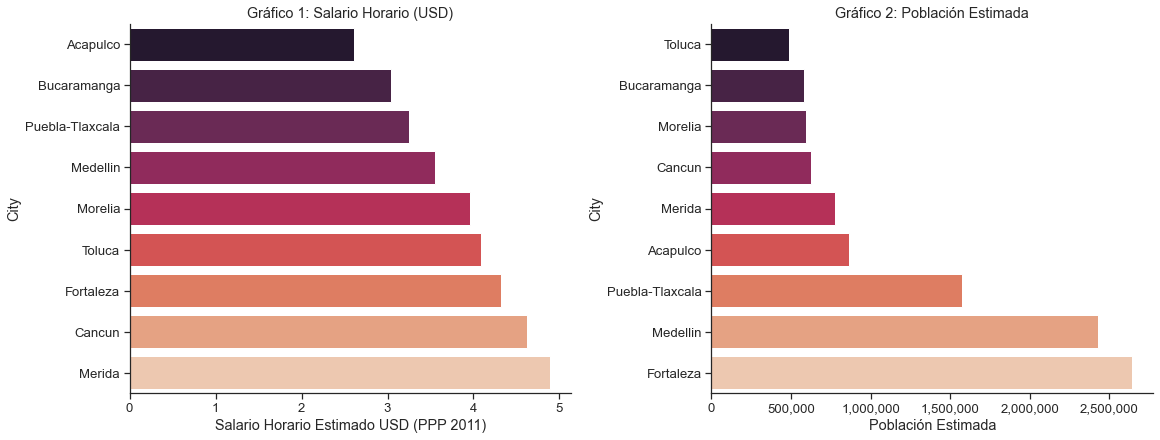

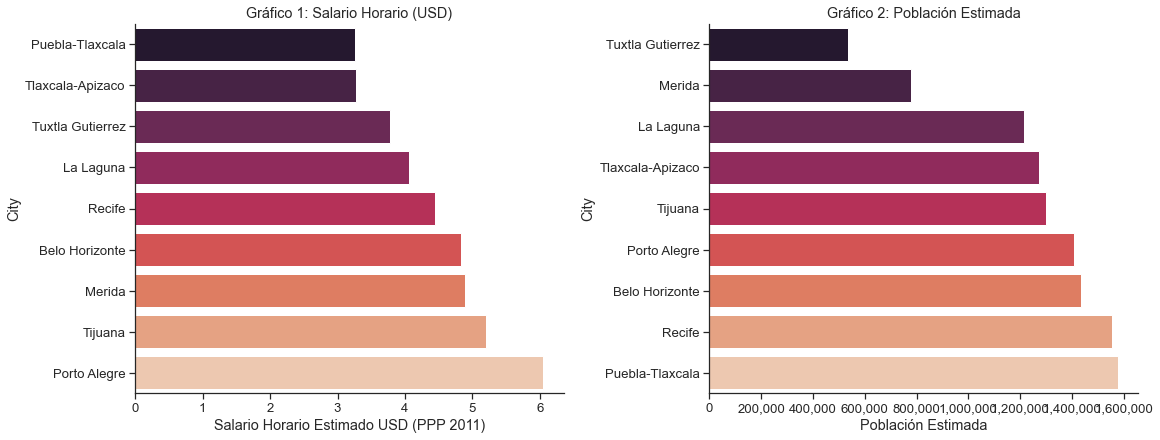

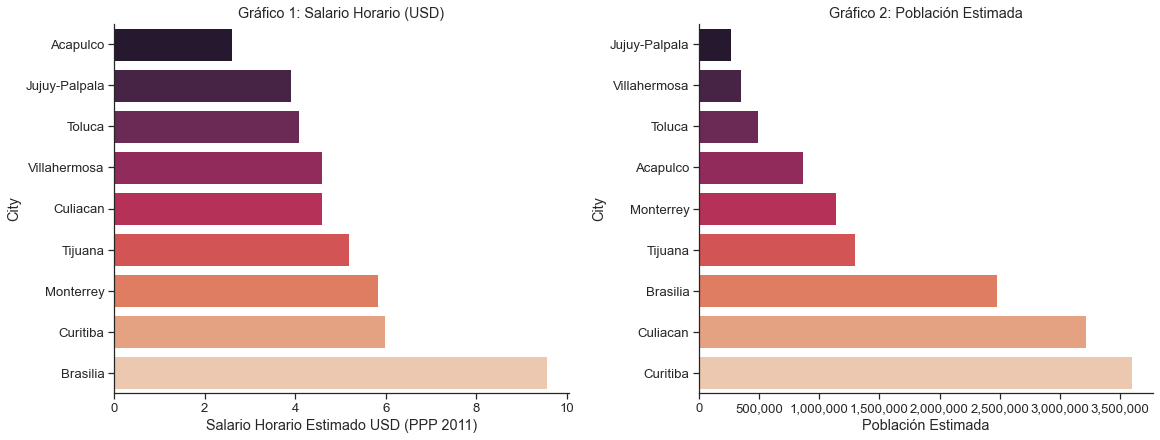

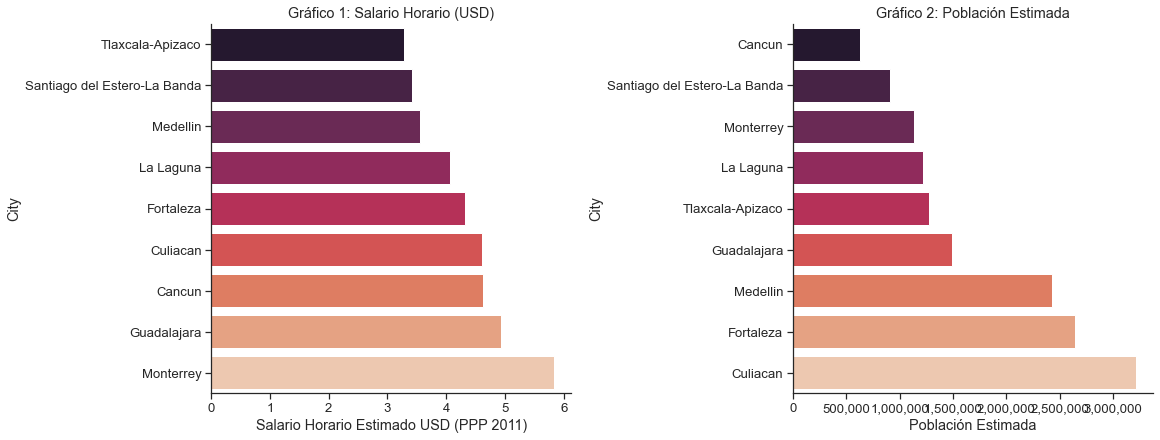

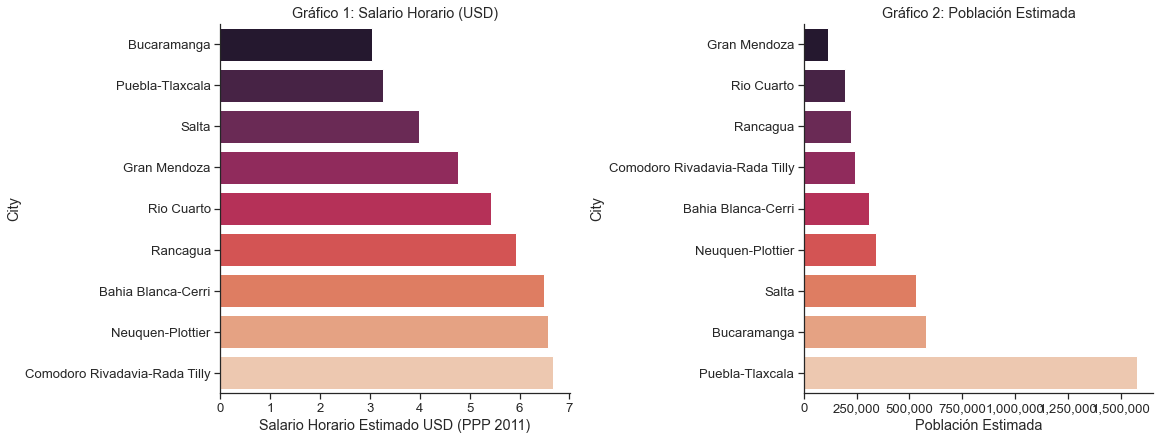

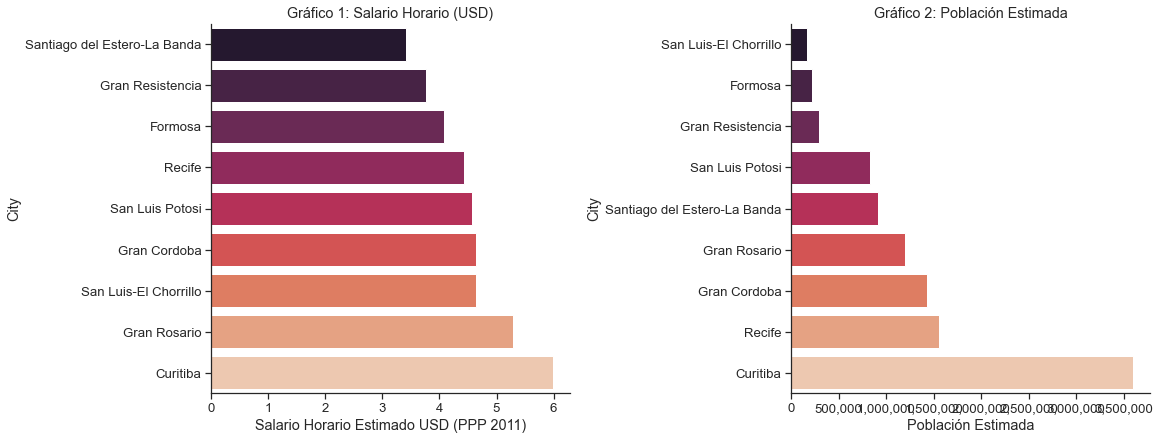

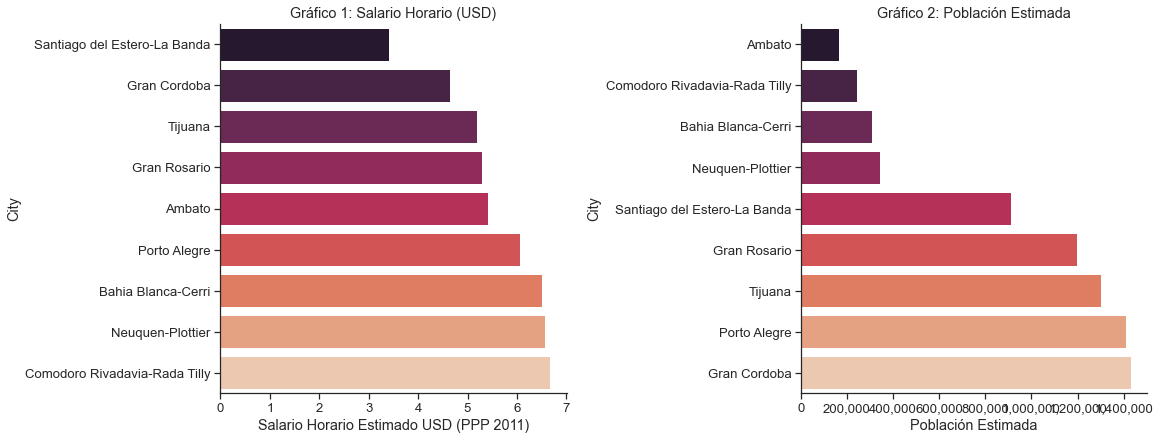

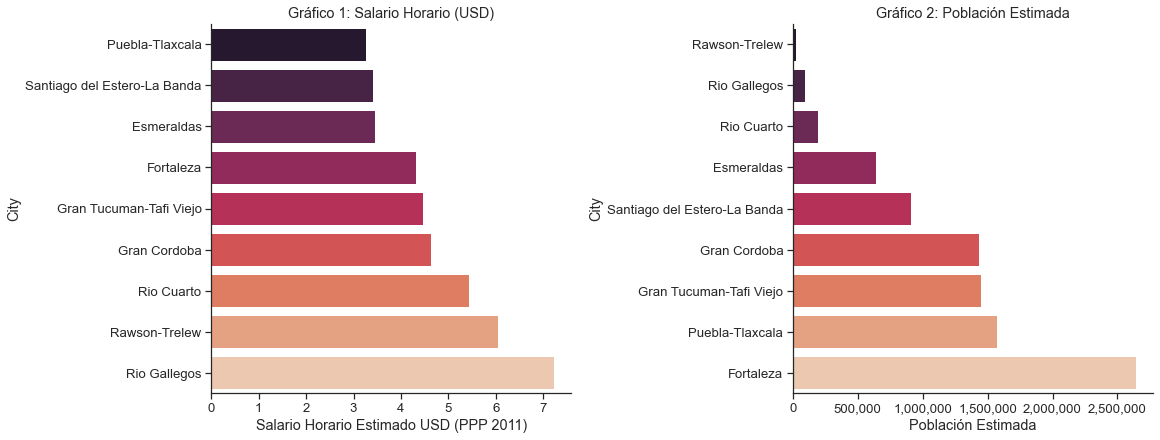

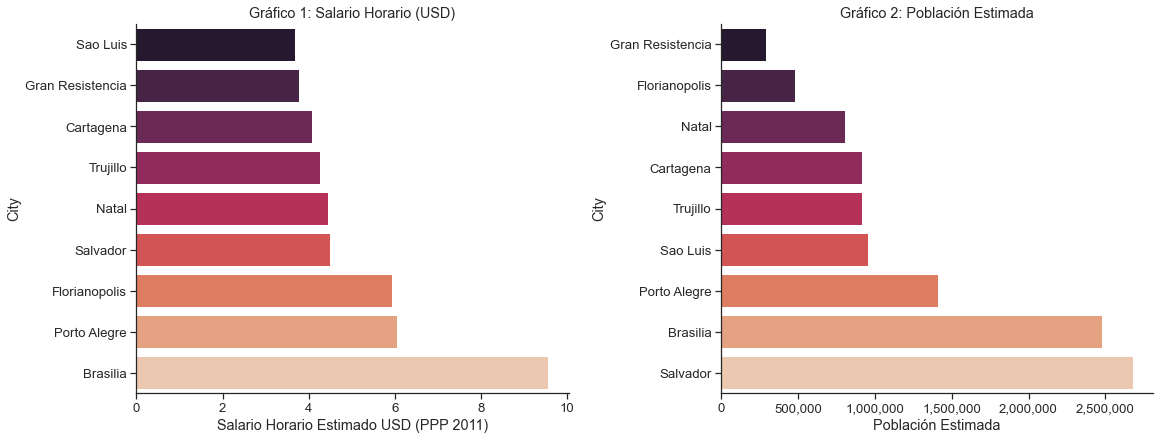

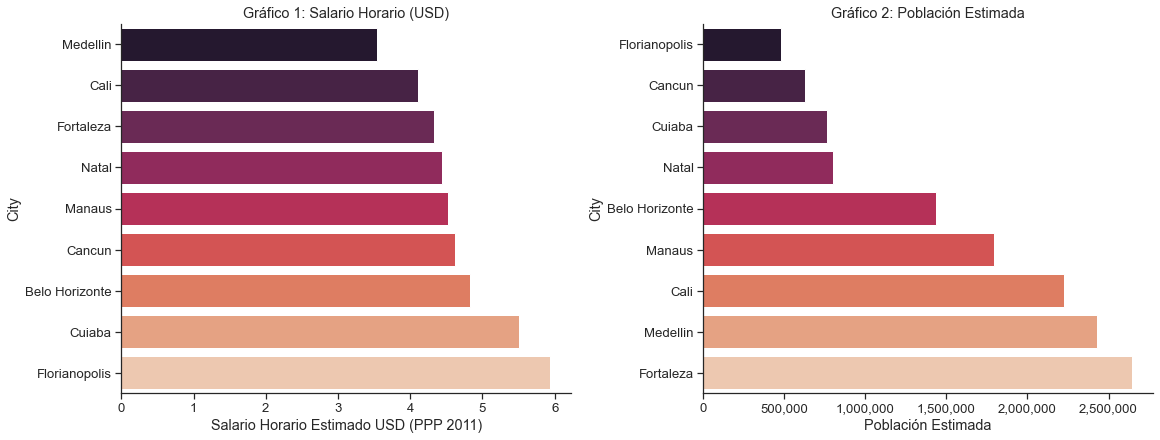

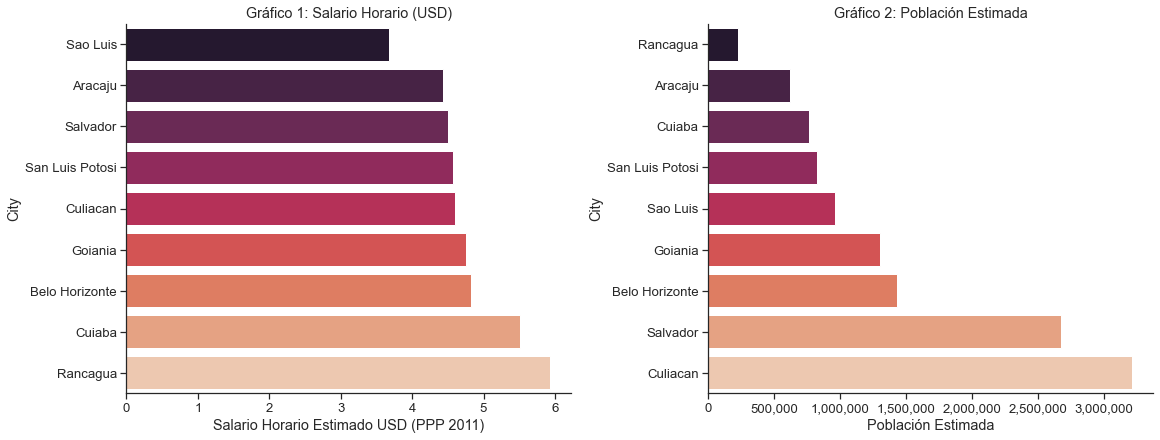

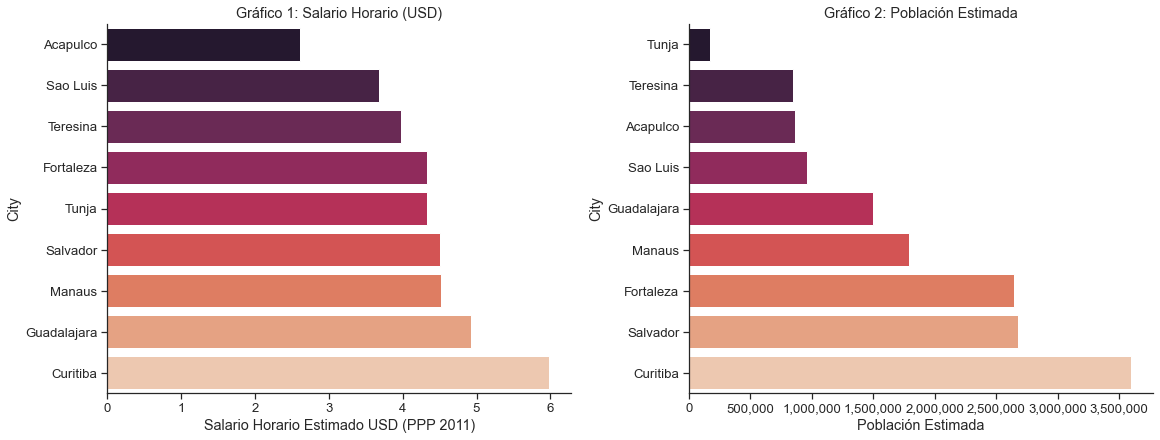

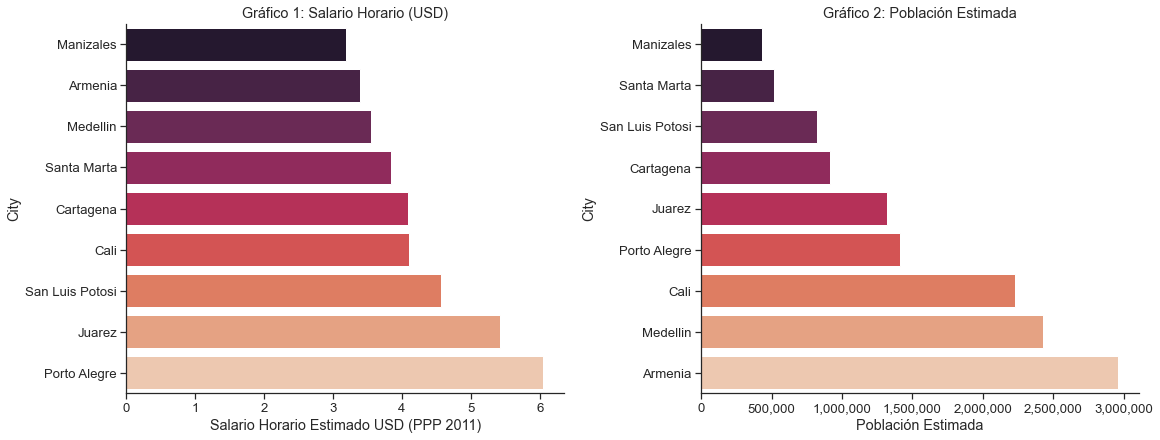

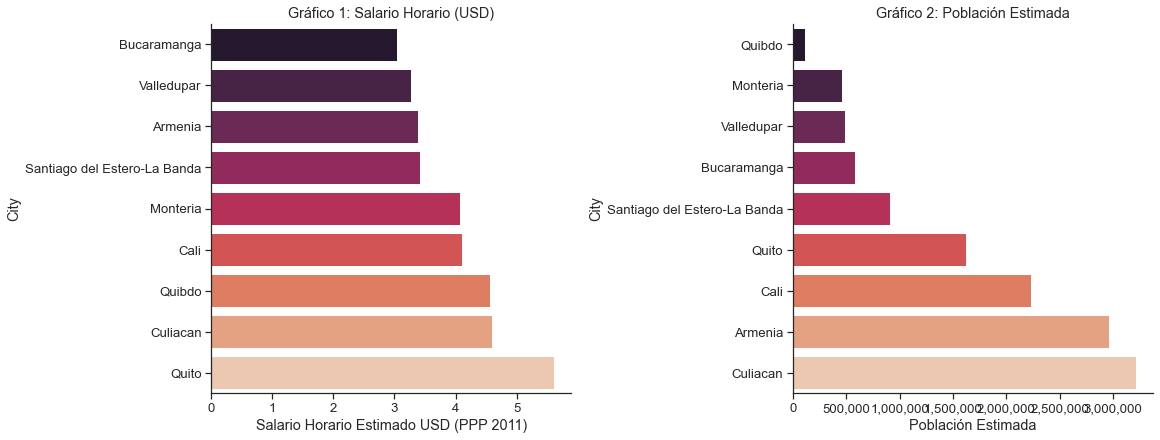

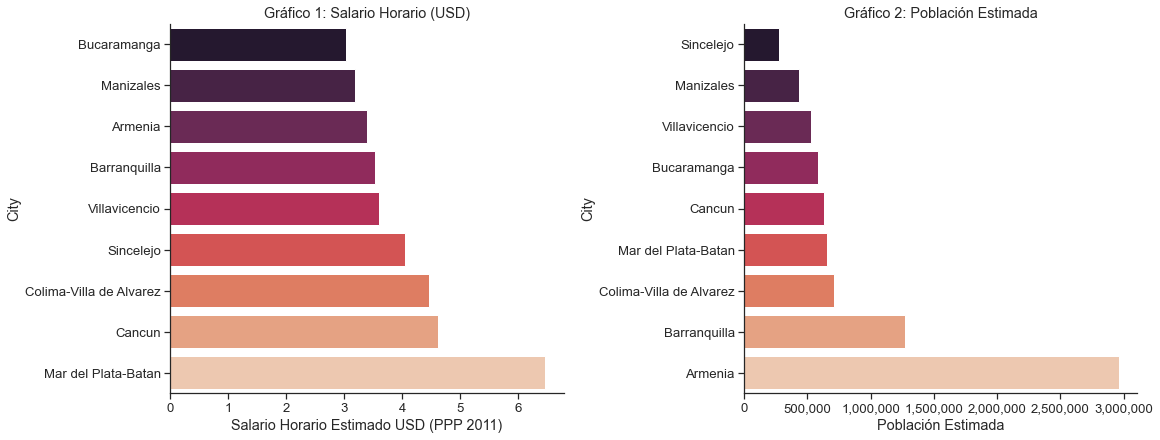

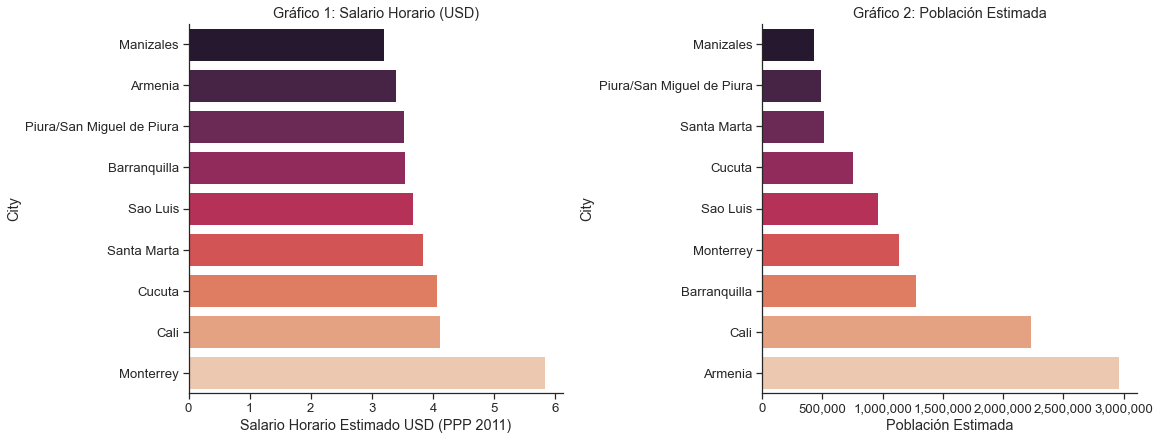

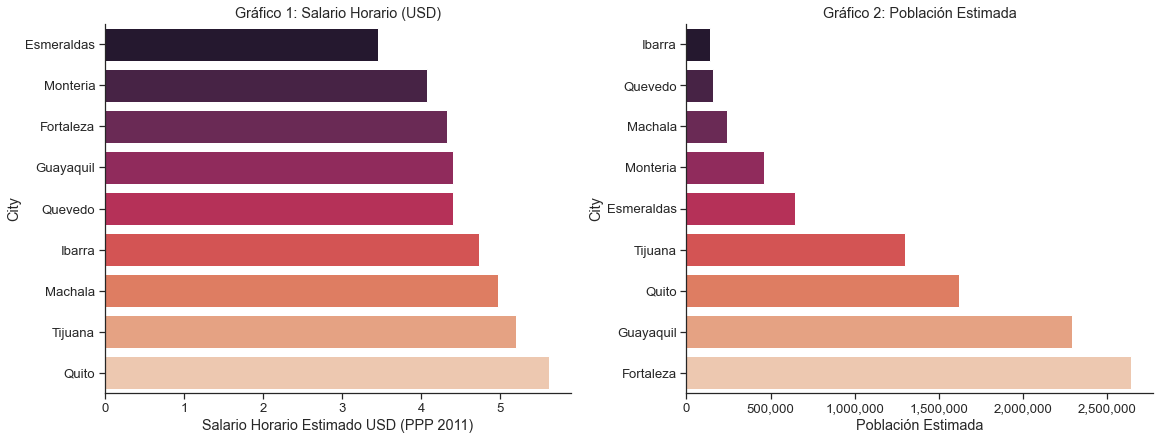

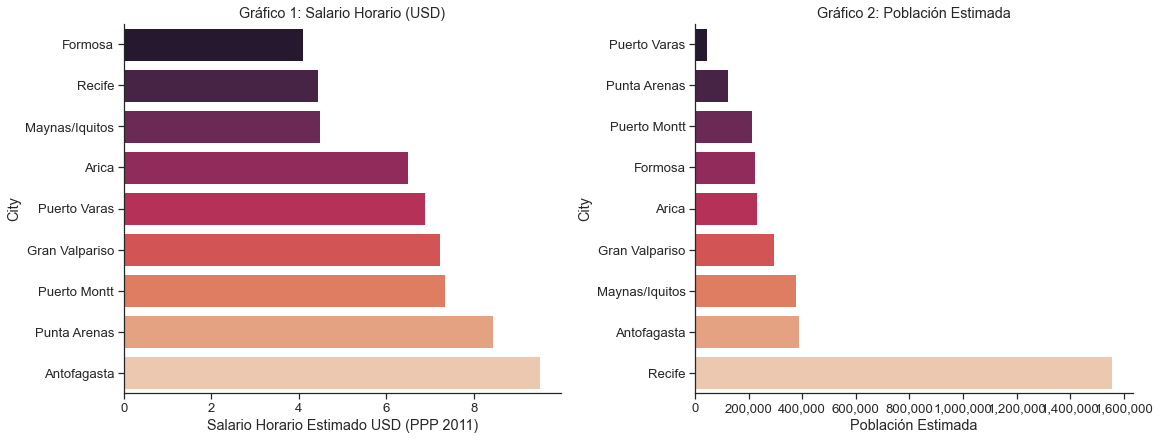

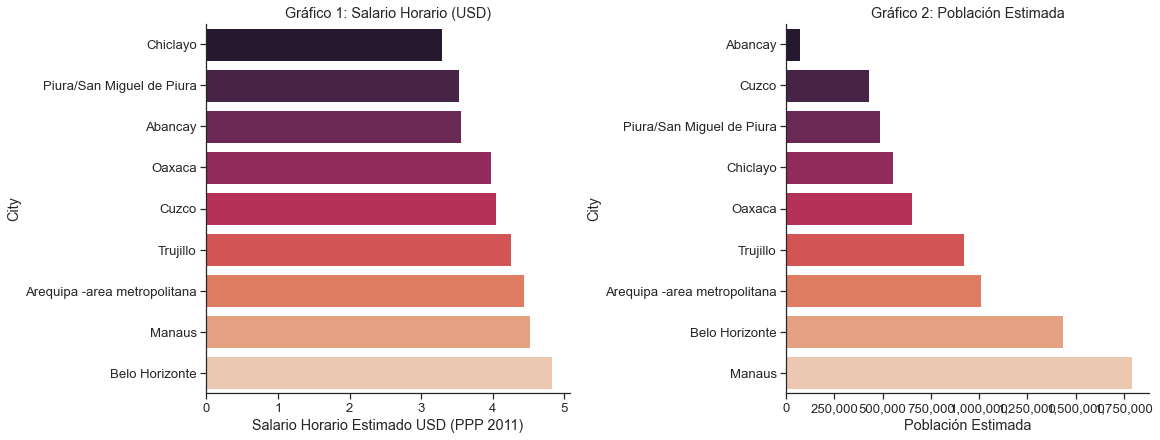

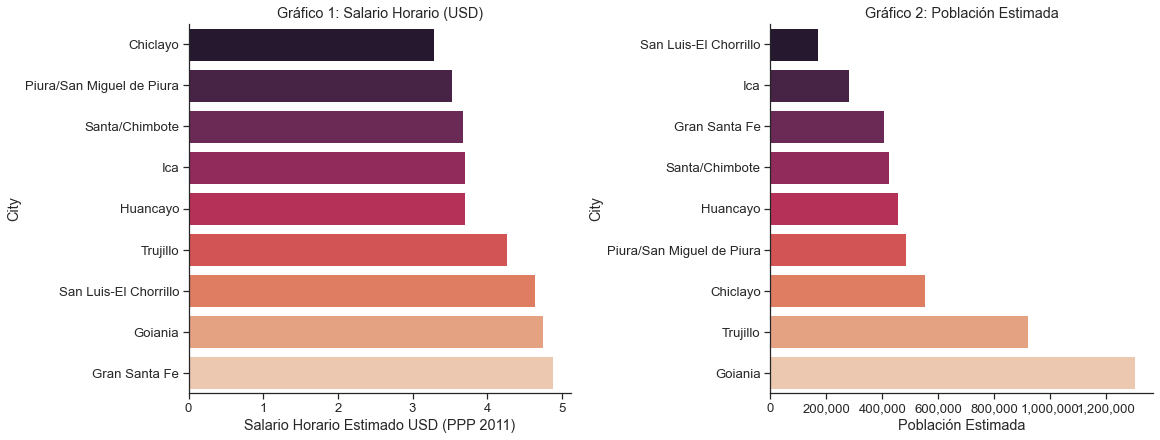

In [203]:
for k in muestra:
    #Loc en la df que necesito
    df = merge.loc[muestra[k]].droplevel(0).rename(columns={'pops':'Población Estimada',('Salario Horario (PPP 2011)', 'Salario Horario (PPP 2011)'):'Salario Horario Estimado USD (PPP 2011)'})
    
    #fig
    f, axes = plt.subplots(1, 2,figsize=(16,6) ,constrained_layout=True)

    #axes
    sns.barplot(x='Salario Horario Estimado USD (PPP 2011)', y=df.sort_values('Salario Horario Estimado USD (PPP 2011)').index, data=df.sort_values('Salario Horario Estimado USD (PPP 2011)'),palette='rocket' , orient='h' , ax=axes[0]).set_title('Gráfico 1: Salario Horario (USD)')
    sns.barplot(x='Población Estimada', y=df.sort_values('Población Estimada').index, data=df.sort_values('Población Estimada'),palette='rocket' , orient='h'  ,ax=axes[1]).set_title('Gráfico 2: Población Estimada')

    #Formato
    sns.set(font_scale=1.2)
    sns.set_style("ticks")
    sns.despine()
    plt.ticklabel_format(style='plain', axis='x')
    axes[1].get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    #plt.tight_layout()
        
    #Guardo el plot
    plt.savefig('informes\\'+k+'\\images\\salario_pops.png',bbox_inches='tight')
    #plt.show()
    #break

### Brecha Salarial

In [391]:
latlongs = pd.read_excel(direc+'\\latlongs.xlsx',index_col=[0,1])

In [455]:
latlongs['lat'] = latlongs['geometry'].str.split(',').apply(lambda x: x[0])

In [456]:
latlongs['lon'] = latlongs['geometry'].str.split(',').apply(lambda x: x[1])

In [457]:
latlongs = gpd.GeoDataFrame(latlongs, geometry=gpd.points_from_xy(latlongs.lon, latlongs.lat)).drop(columns=['Point A','lat','lon'])

In [383]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<Figure size 432x288 with 0 Axes>

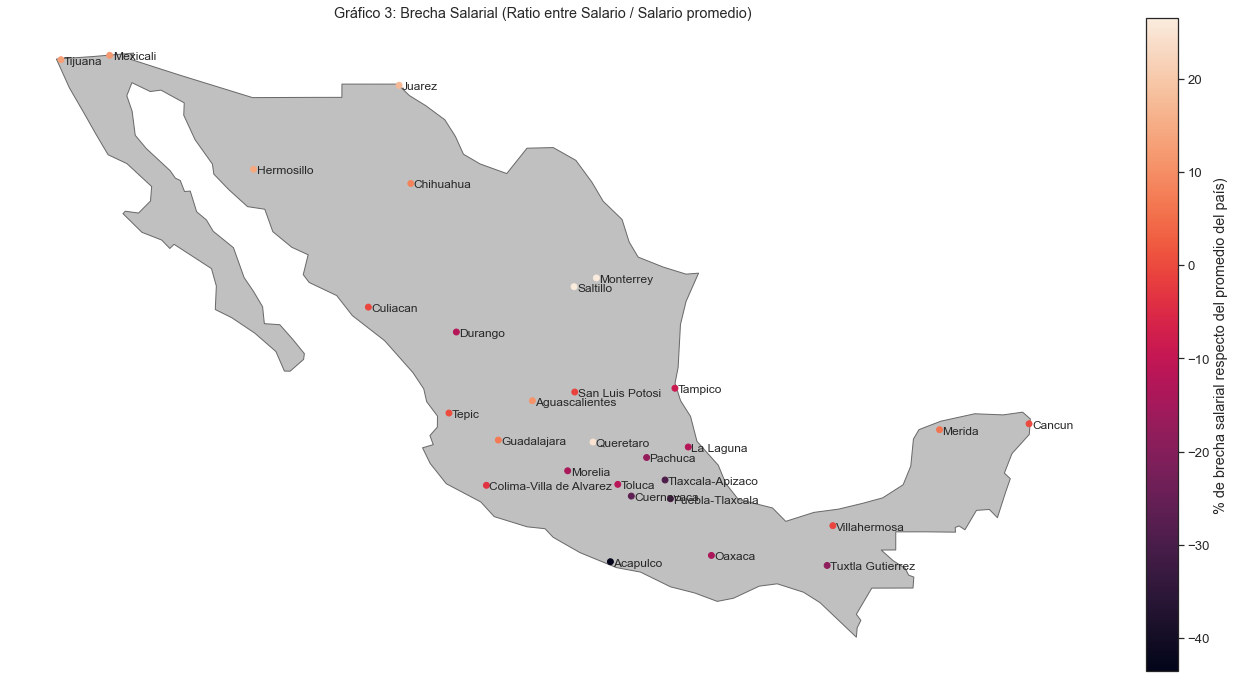

<Figure size 432x288 with 0 Axes>

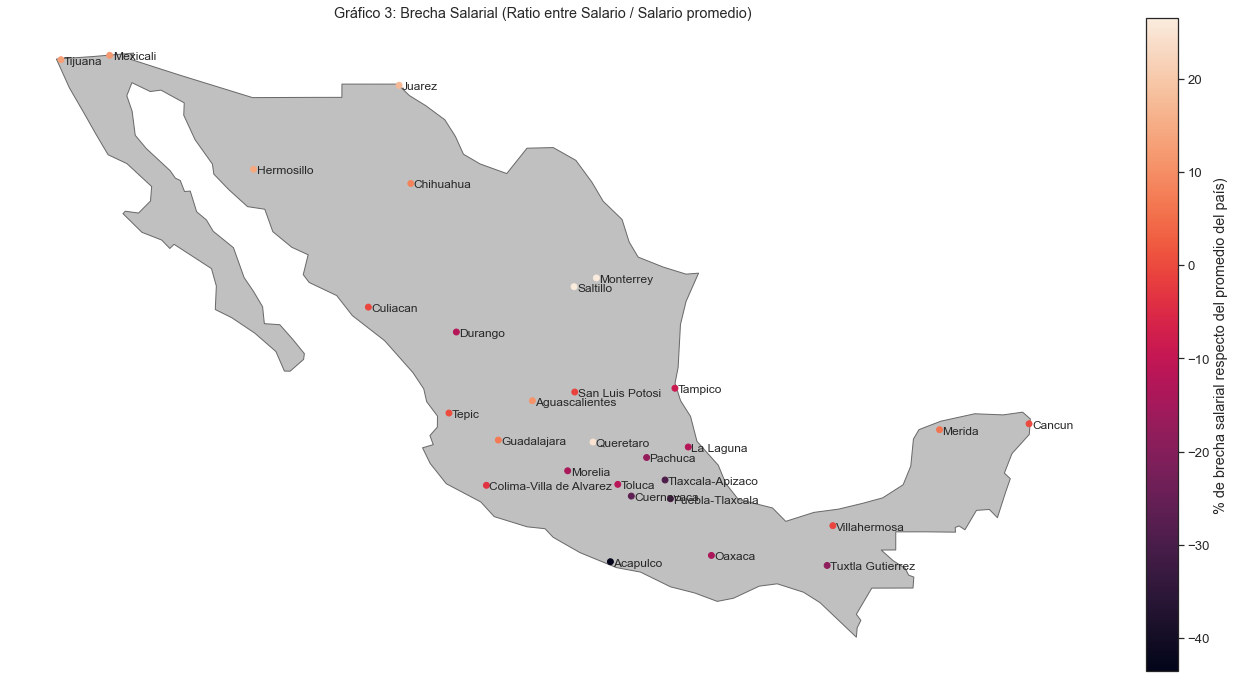

<Figure size 432x288 with 0 Axes>

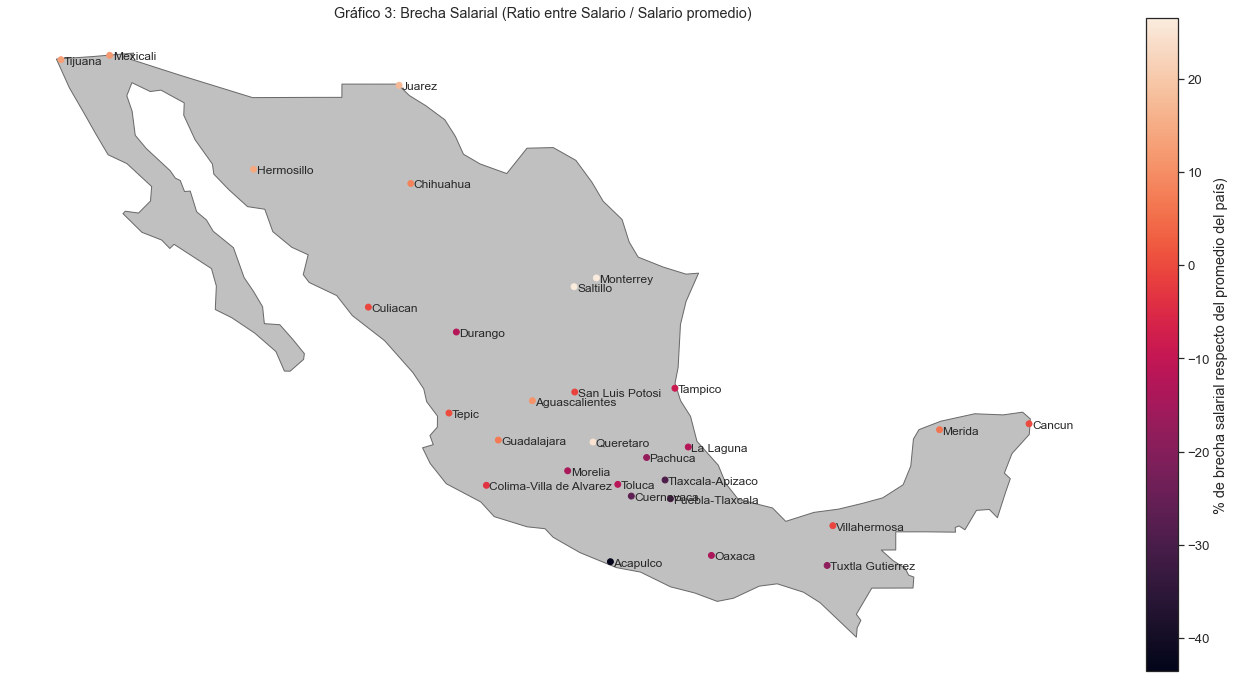

<Figure size 432x288 with 0 Axes>

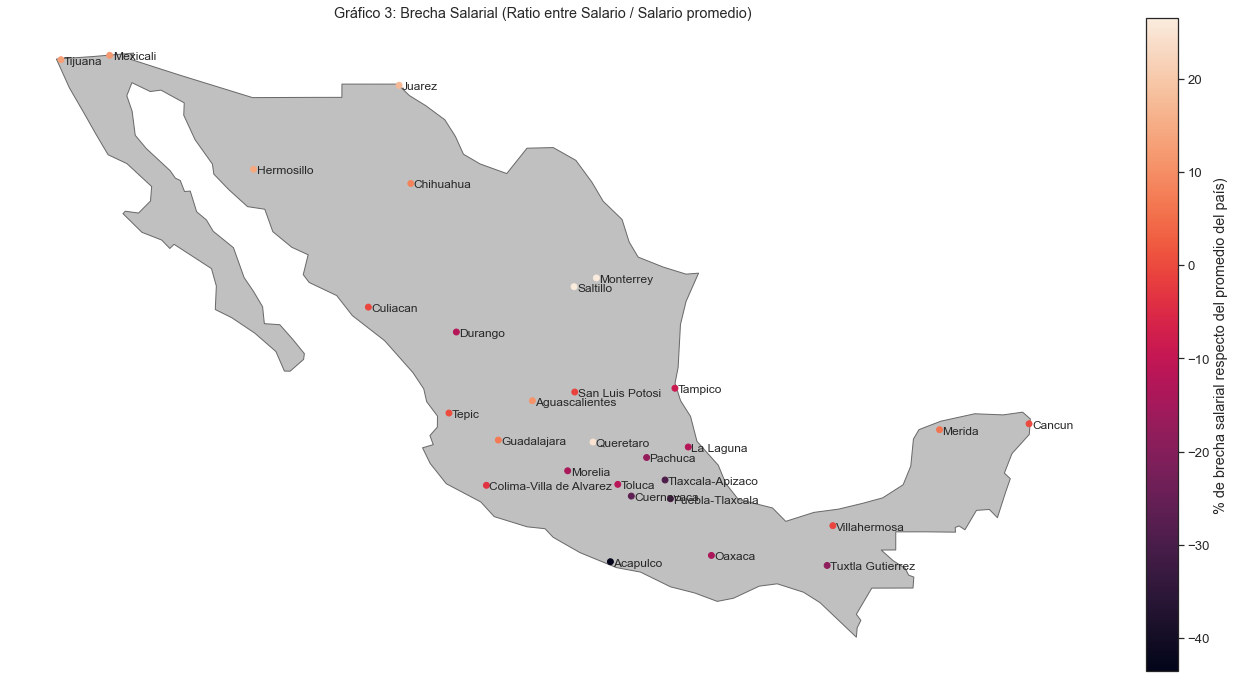

<Figure size 432x288 with 0 Axes>

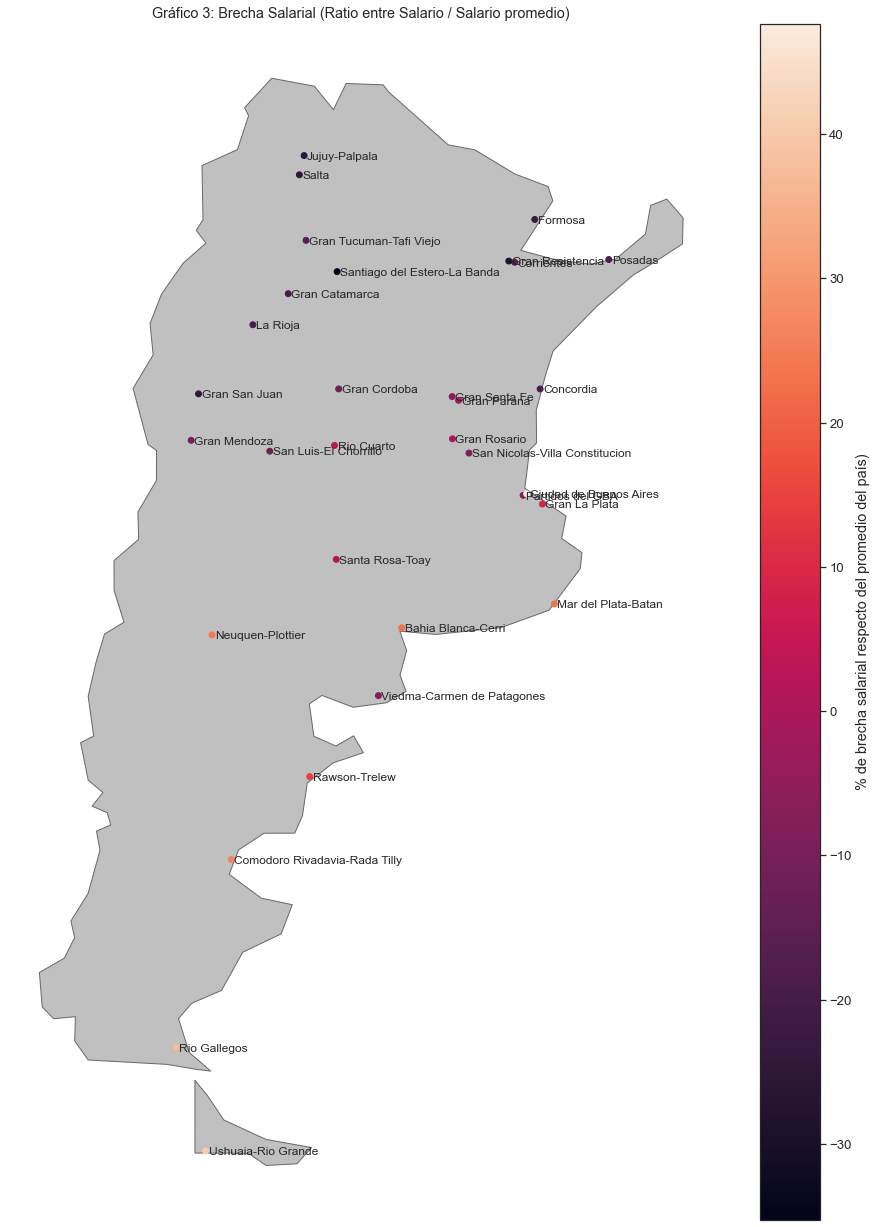

<Figure size 432x288 with 0 Axes>

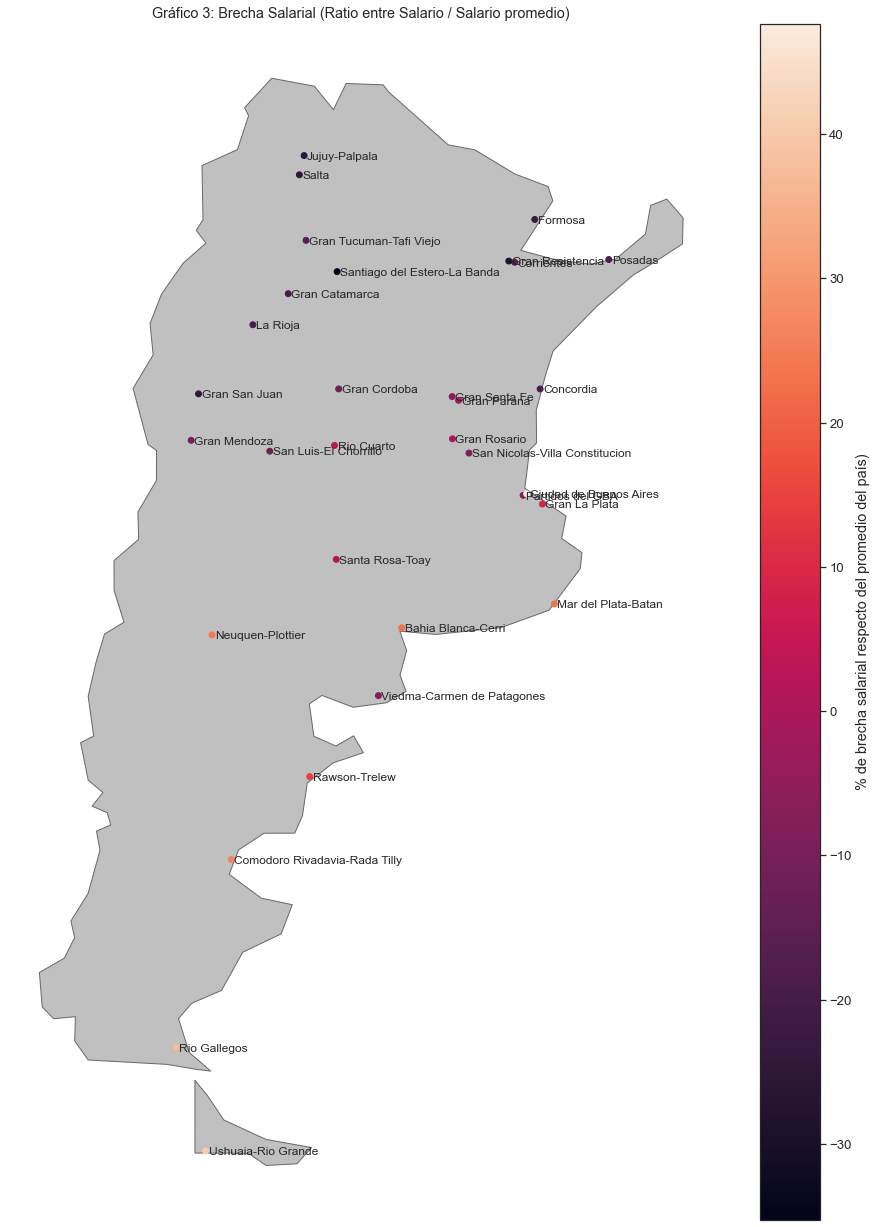

<Figure size 432x288 with 0 Axes>

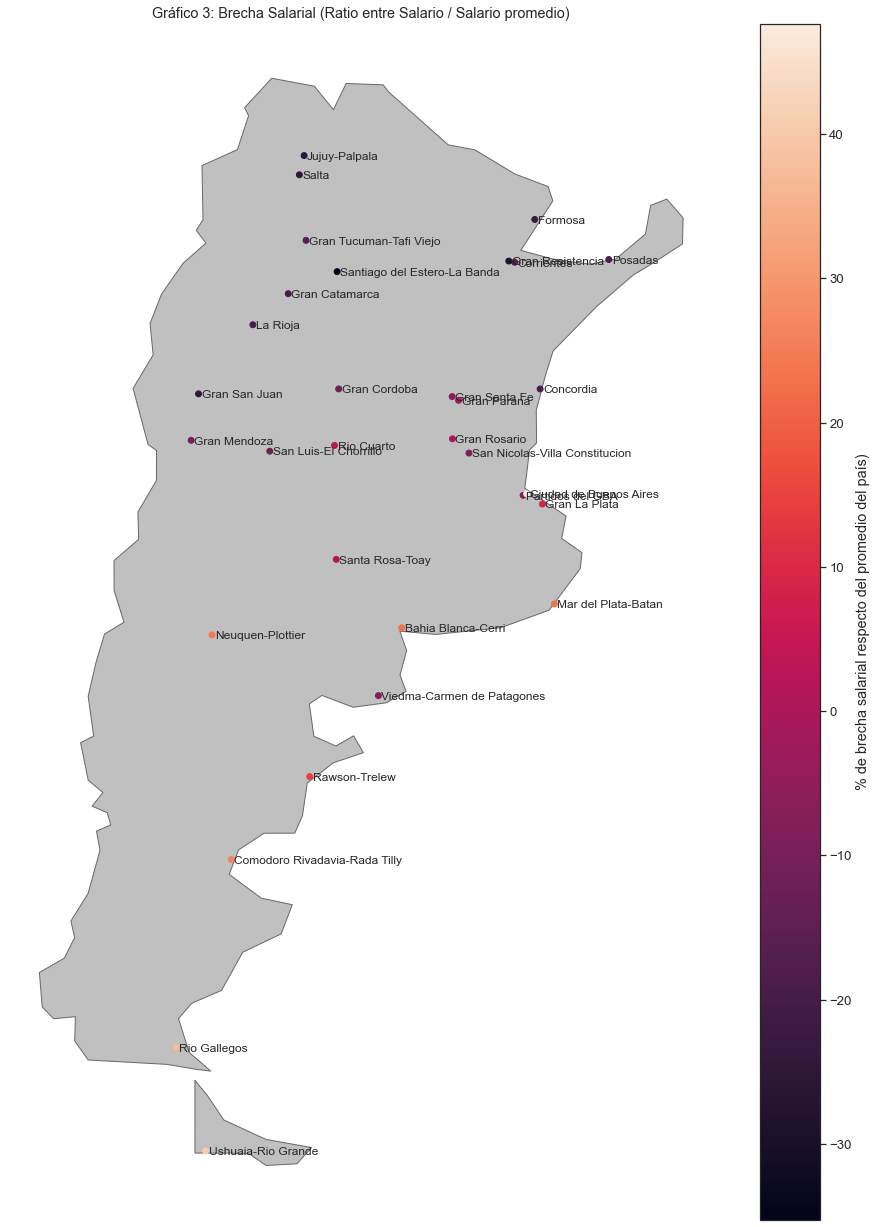

<Figure size 432x288 with 0 Axes>

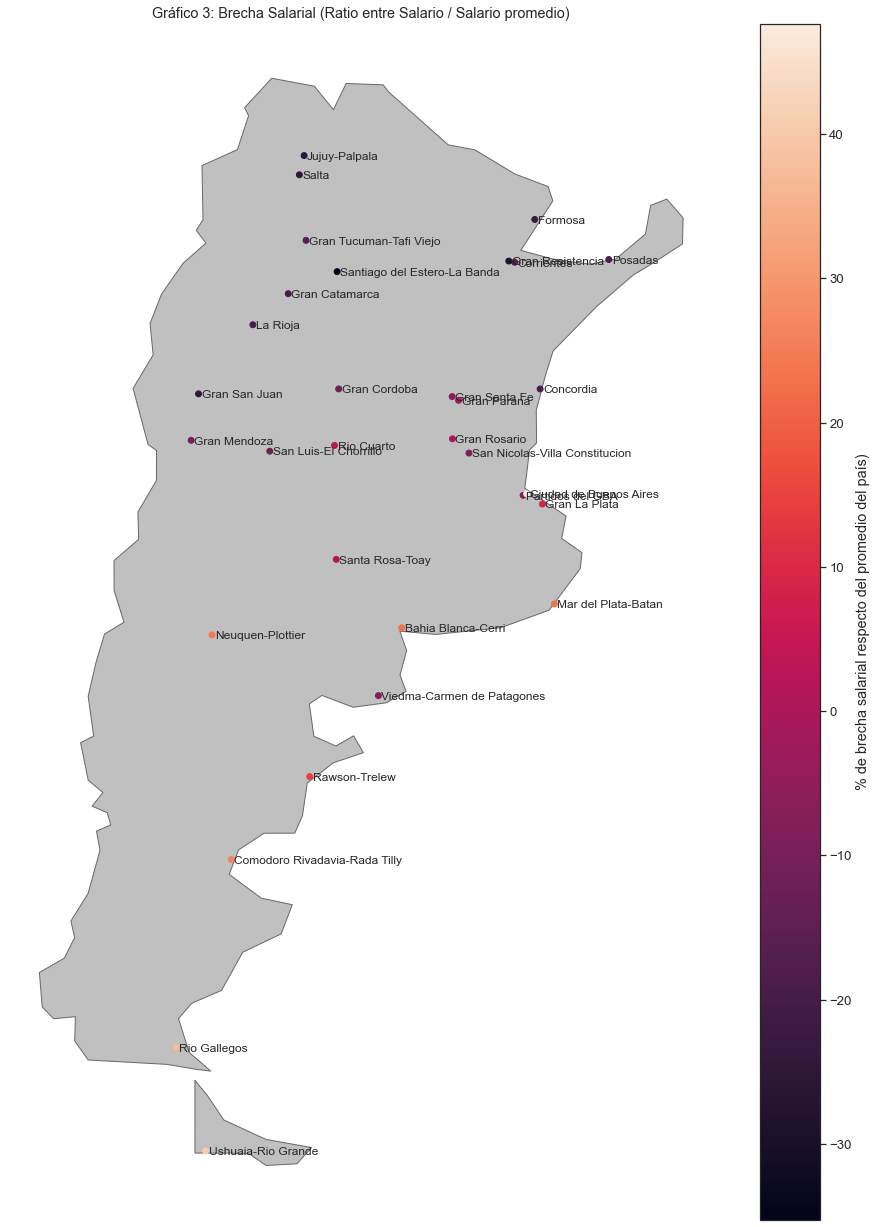

<Figure size 432x288 with 0 Axes>

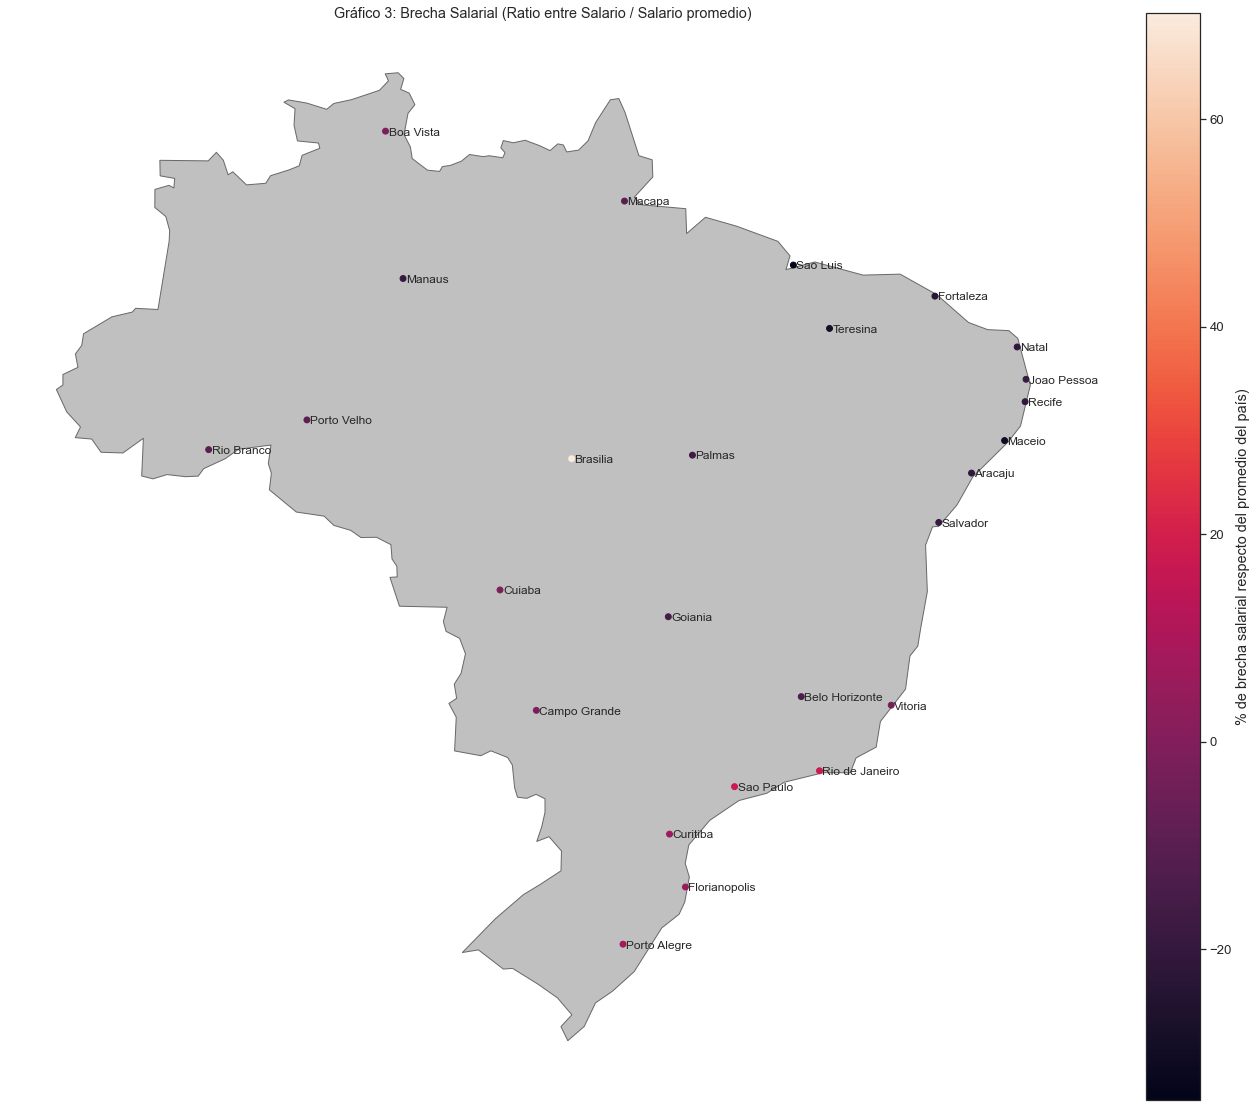

<Figure size 432x288 with 0 Axes>

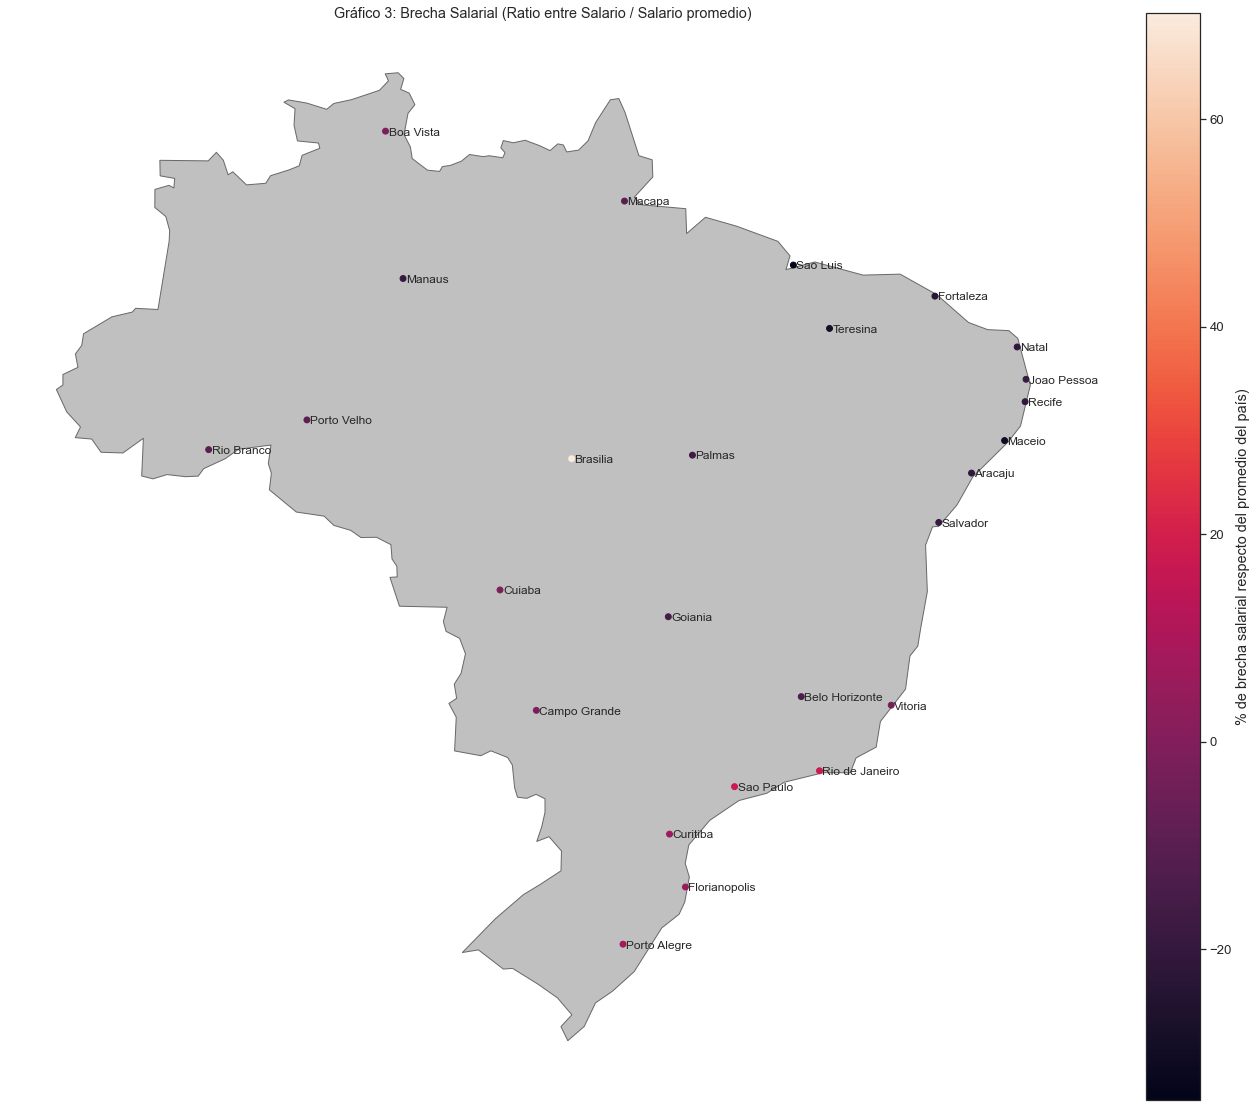

<Figure size 432x288 with 0 Axes>

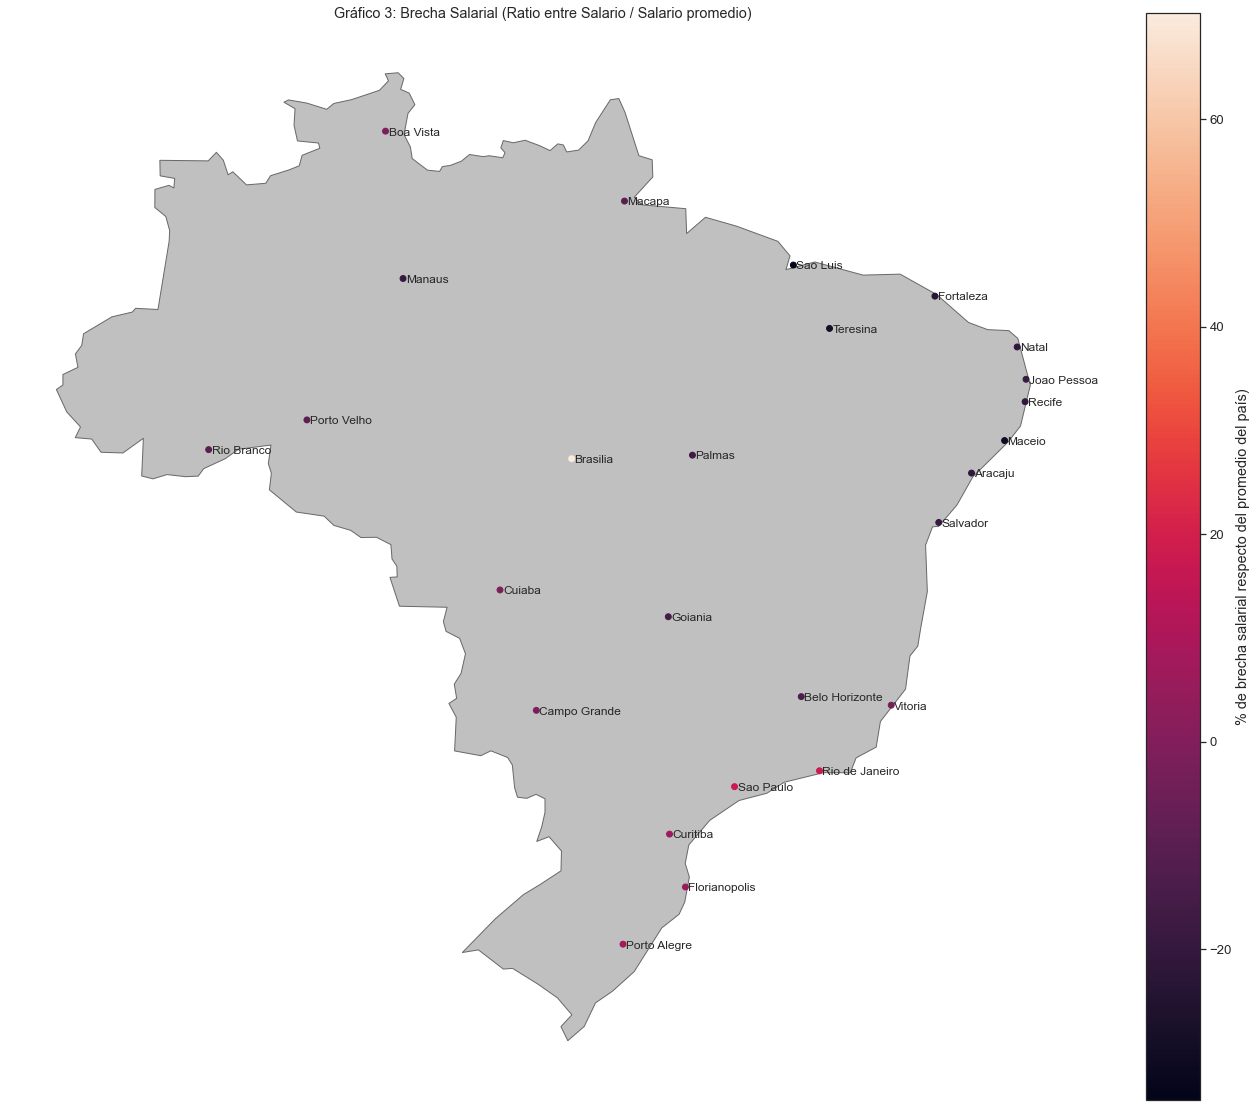

<Figure size 432x288 with 0 Axes>

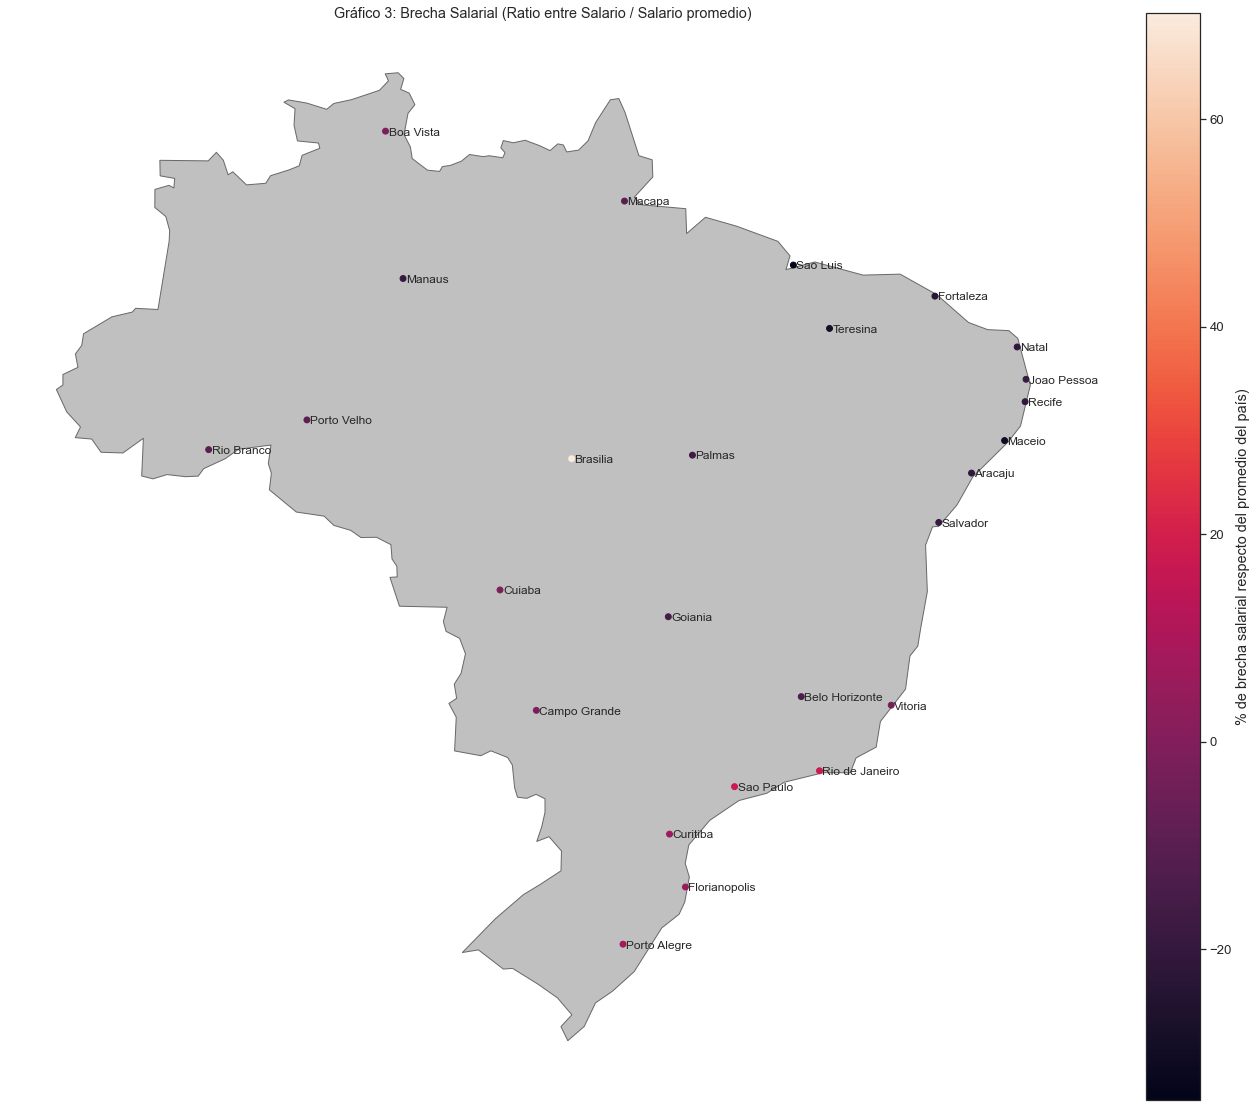

<Figure size 432x288 with 0 Axes>

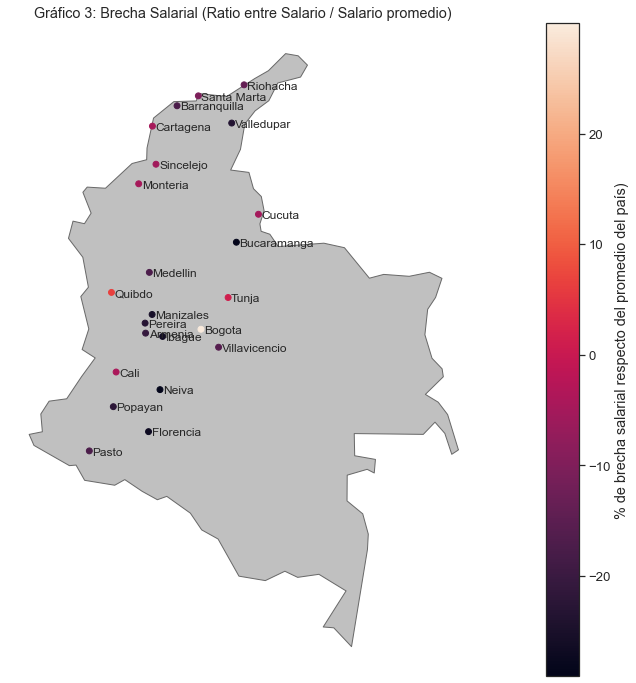

<Figure size 432x288 with 0 Axes>

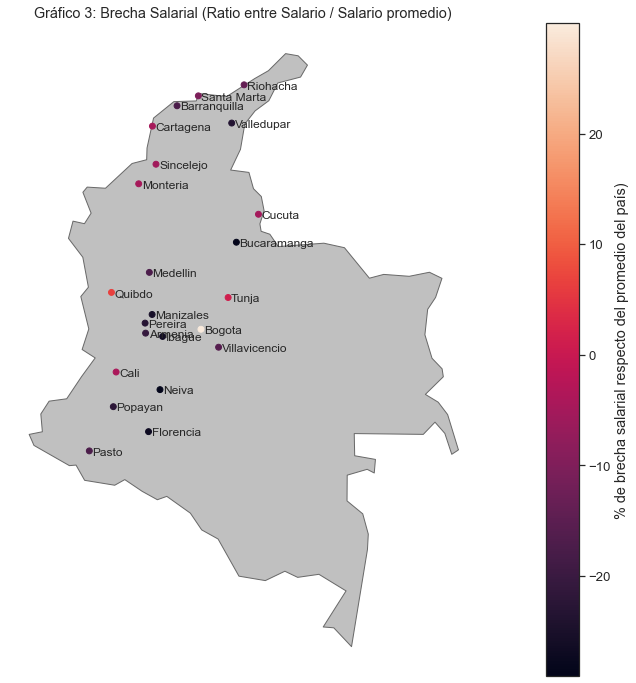

<Figure size 432x288 with 0 Axes>

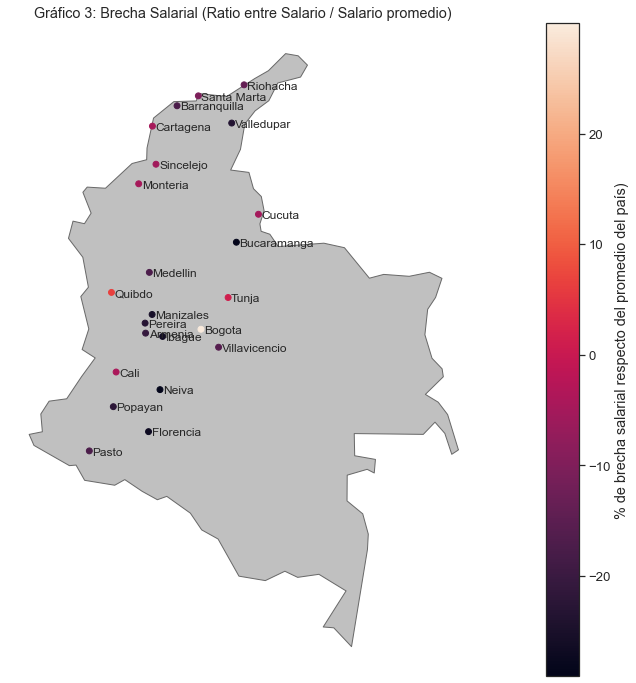

<Figure size 432x288 with 0 Axes>

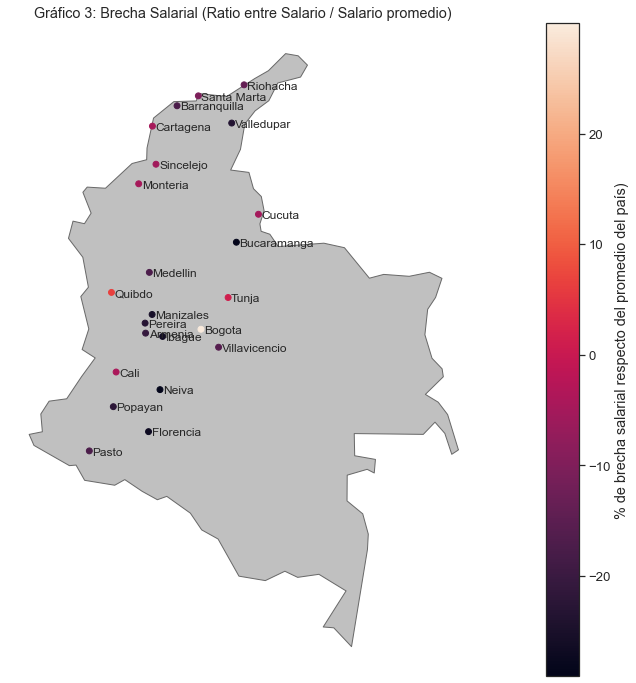

<Figure size 432x288 with 0 Axes>

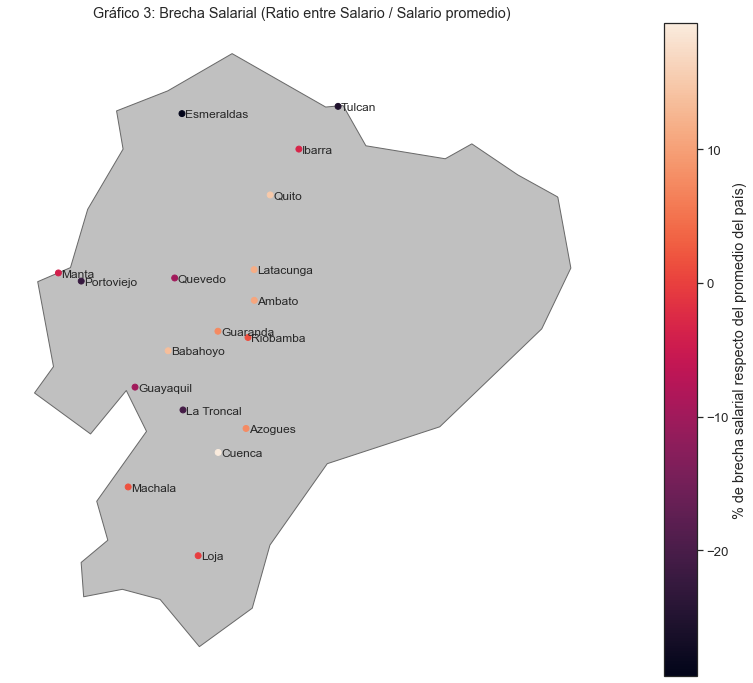

<Figure size 432x288 with 0 Axes>

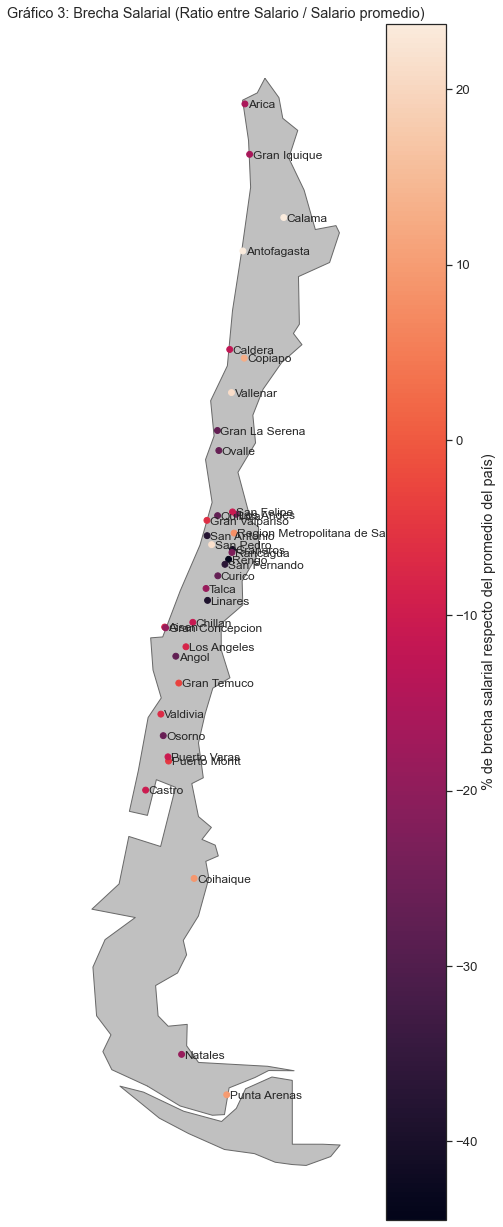

<Figure size 432x288 with 0 Axes>

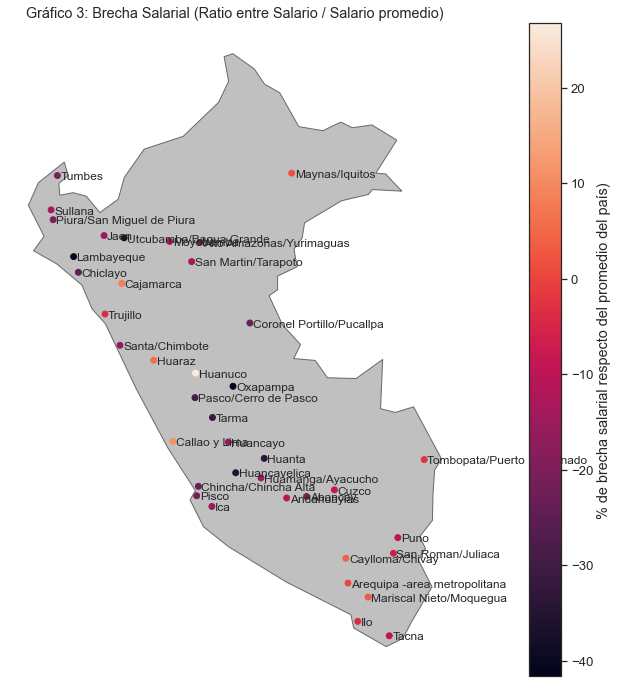

<Figure size 432x288 with 0 Axes>

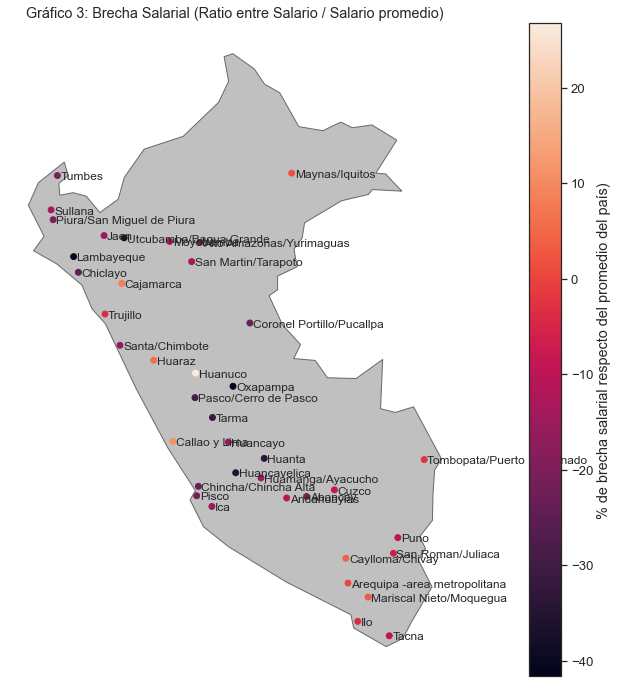

In [475]:
for k in muestra:
    pais = latlongs.loc[idx[:,k],:].reset_index()['Country'][0]
    df = latlongs.loc[idx[pais,:],['% Brecha Salarial (promedio país)','geometry']].droplevel(0)
    
    fig = plt.figure()
    mpl.rcParams['figure.facecolor'] = 'white'
    
    if pais=='Brasil':
        pais='Brazil'
    
    size_dict = {'Argentina':(16,22) , 'Chile' : (12,22) ,'Mexico' : (24,12), 'Brazil' : (24,20) , 'Colombia':(24,12) , 'Ecuador':(24,12) , 'Peru':(24,12)}
    
    ax = world[world['name'].isin([pais])].plot(color='silver', figsize = size_dict[pais] , edgecolor='dimgrey')
    ax.axis('off')

    bg_color = 'lightgrey'
    ax.patch.set_facecolor(bg_color)

    for x, y, label in zip(df.geometry.x, df.geometry.y, df.index):
        ax.annotate(label, xy=(x, y), xytext=(3, -4), textcoords="offset points" ,size=12)

    df.plot(column='% Brecha Salarial (promedio país)' , ax = ax, legend = True,  legend_kwds={'label':'% de brecha salarial respecto del promedio del país)'}, markersize = 35 , cmap='rocket').set_title('Gráfico 3: Brecha Salarial (Ratio entre Salario / Salario promedio)')
    plt.savefig('informes\\'+k+'\\images\\brecha_promedio.png' ,bbox_inches='tight')

## Con ext

### mlab

In [479]:
mlab = pd.read_excel(direc+'\\mlabi.xlsx',index_col=[0,1])

In [498]:
mlab = mlab.join(merge[['pops','index1']])

In [499]:
muestra_mlab = muestra

In [502]:
index = pd.DataFrame(columns=['Country','City'])

In [506]:
for v in muestra.values():
    l = [v[e] for e in range(len(v))]
    print(l)
    break

[('Mexico', 'Merida'), ('Mexico', 'Cancun'), ('Mexico', 'Morelia'), ('Mexico', 'Toluca'), ('Colombia', 'Bucaramanga'), ('Brasil', 'Fortaleza'), ('Colombia', 'Medellin'), ('Mexico', 'Puebla-Tlaxcala')]


In [488]:
muestra_mlab['Puebla-Tlaxcala'][4]

('Mexico', 'Acapulco')

In [490]:
for v in muestra_mlab.values():
    if ('Mexico', 'Acapulco') in v:
        v.remove(('Mexico', 'Acapulco'))    

In [491]:
muestra_mlab

{'Puebla-Tlaxcala': [('Mexico', 'Merida'),
  ('Mexico', 'Cancun'),
  ('Mexico', 'Morelia'),
  ('Mexico', 'Toluca'),
  ('Colombia', 'Bucaramanga'),
  ('Brasil', 'Fortaleza'),
  ('Colombia', 'Medellin'),
  ('Mexico', 'Puebla-Tlaxcala')],
 'Merida': [('Mexico', 'Puebla-Tlaxcala'),
  ('Mexico', 'Tijuana'),
  ('Mexico', 'Tlaxcala-Apizaco'),
  ('Mexico', 'Tuxtla Gutierrez'),
  ('Mexico', 'La Laguna'),
  ('Brasil', 'Porto Alegre'),
  ('Brasil', 'Recife'),
  ('Brasil', 'Belo Horizonte'),
  ('Mexico', 'Merida')],
 'Culiacan': [('Mexico', 'Toluca'),
  ('Mexico', 'Tijuana'),
  ('Mexico', 'Monterrey'),
  ('Mexico', 'Villahermosa'),
  ('Brasil', 'Brasilia'),
  ('Argentina', 'Jujuy-Palpala'),
  ('Brasil', 'Curitiba'),
  ('Mexico', 'Culiacan')],
 'La Laguna': [('Mexico', 'Culiacan'),
  ('Mexico', 'Tlaxcala-Apizaco'),
  ('Mexico', 'Cancun'),
  ('Mexico', 'Guadalajara'),
  ('Mexico', 'Monterrey'),
  ('Argentina', 'Santiago del Estero-La Banda'),
  ('Colombia', 'Medellin'),
  ('Brasil', 'Fortaleza'),
  

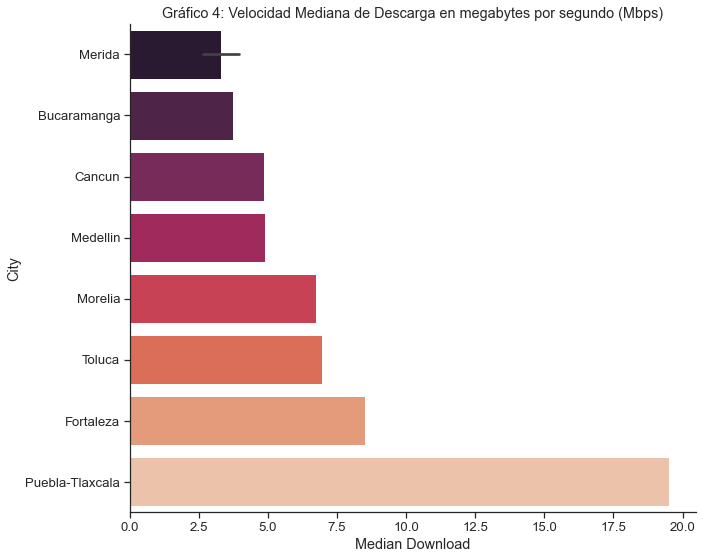

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: MultiIndex([('Mexico', 'Tlaxcala-Apizaco'),\n            ('Mexico',        'La Laguna')],\n           names=['Country', 'City']). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [494]:
for k in muestra:
    #df
    df = mlab.loc[muestra[k]].droplevel(0)#.rename(columns={'pops':'Población Estimada',('Salario Horario (PPP 2011)', 'Salario Horario (PPP 2011)'):'Salario Horario Estimado USD (PPP 2011)'})

    #Plot
    fig, ax = plt.subplots(figsize=(10,8))
    
    sns.barplot(x='Median Download', y=df.sort_values('Median Download').index, data=df.sort_values('Median Download') , palette='rocket' , orient='h' ).set_title('Gráfico 4: Velocidad Mediana de Descarga en megabytes por segundo (Mbps)')

    sns.set(font_scale=1.2)
    sns.set_style("ticks")
    sns.despine()
    plt.tight_layout()
    #plt.savefig("C:/Users/Franco/Python/CAF/Entregables/Informes/manizales 2/informe/images/descarga.png",bbox_inches='tight')
    plt.show()

## Acceso a mercados

In [511]:
am = pd.read_excel(direc+'\\'+files[0],index_col=[0,1])

In [513]:
scdict = dict(zip(['cutoff_{}'.format(e) for e in range(10)],[e for e in range(10)]))

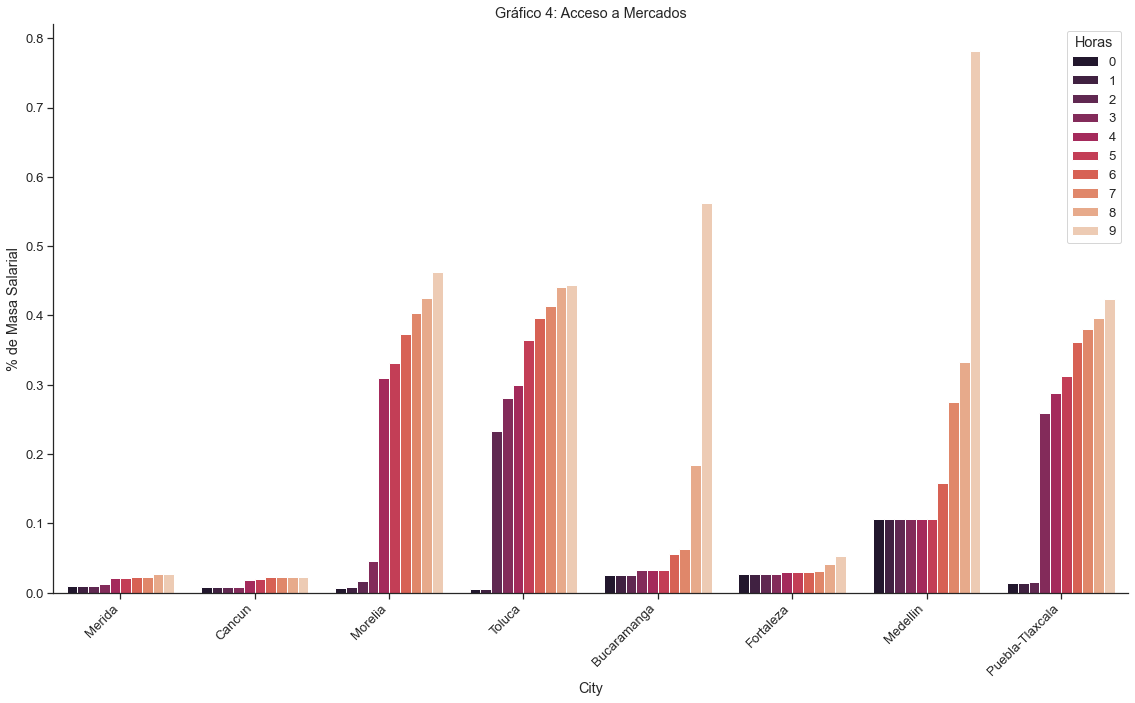

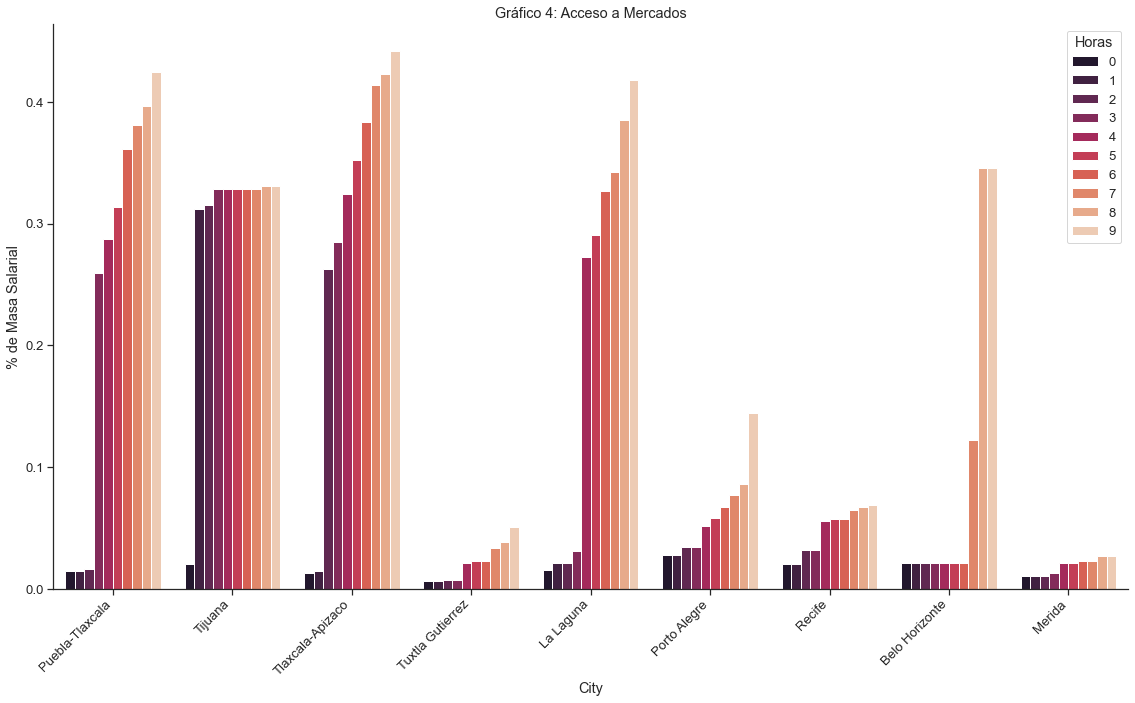

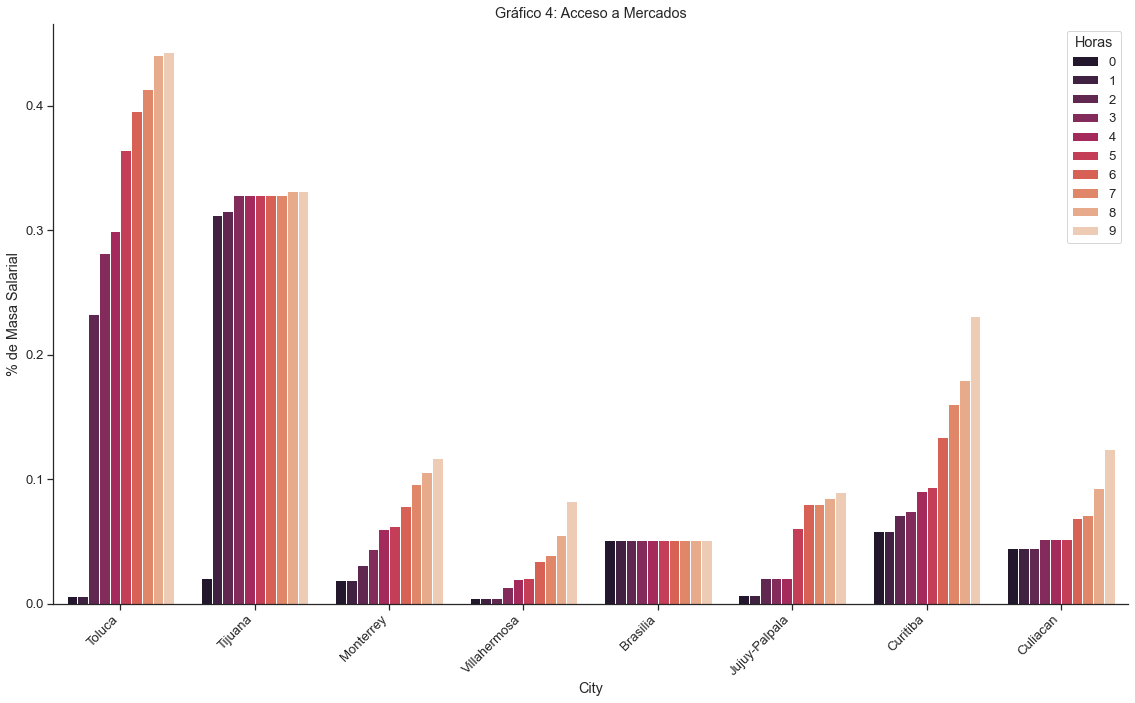

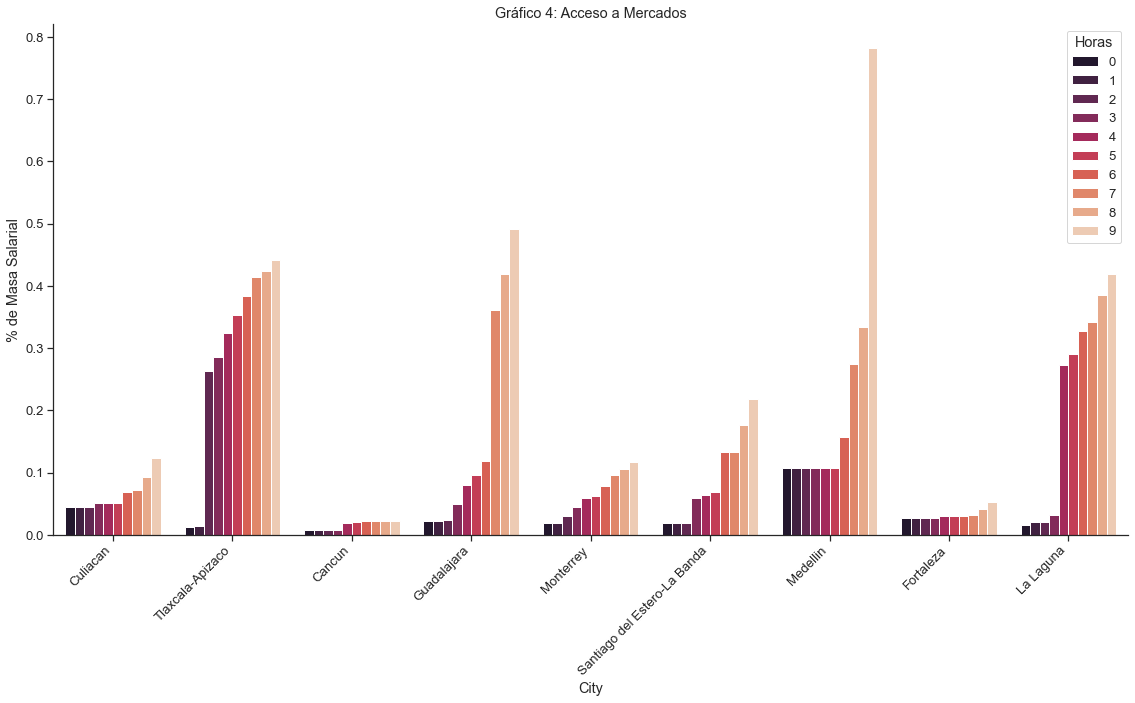

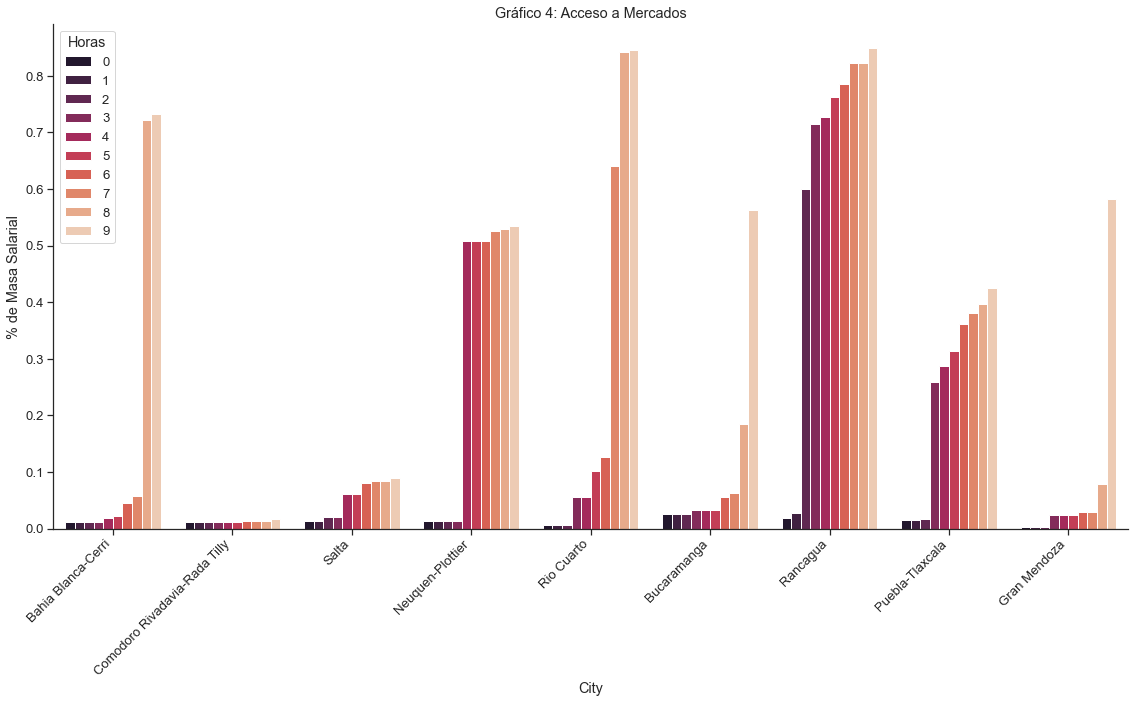

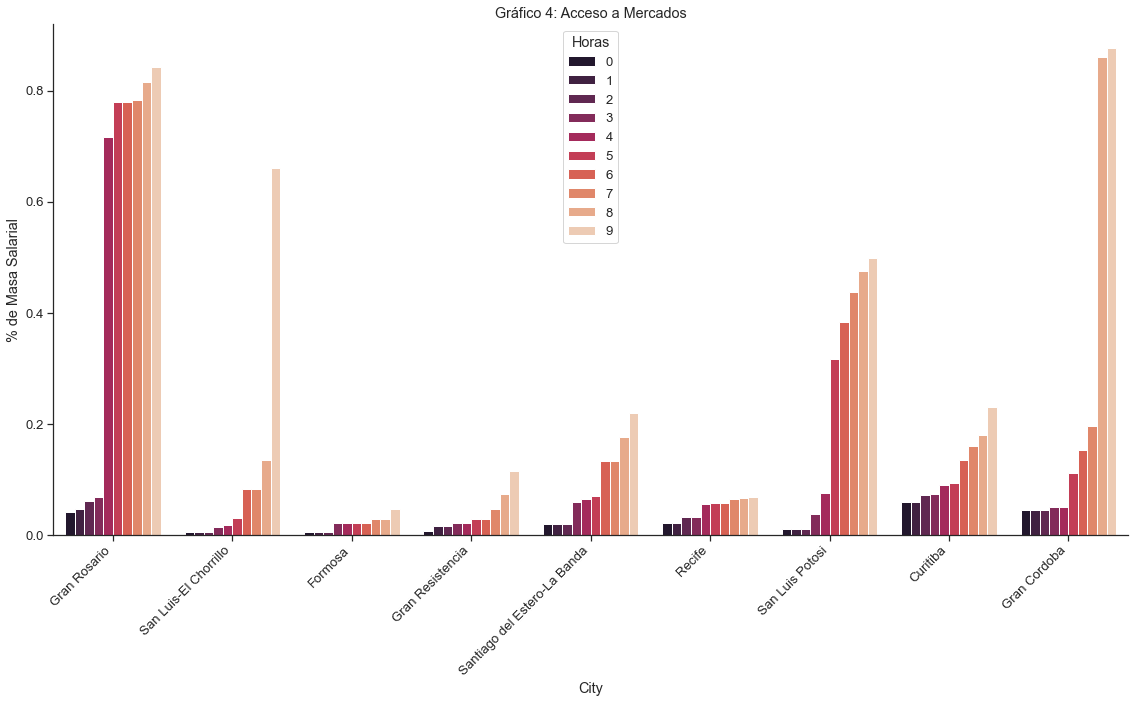

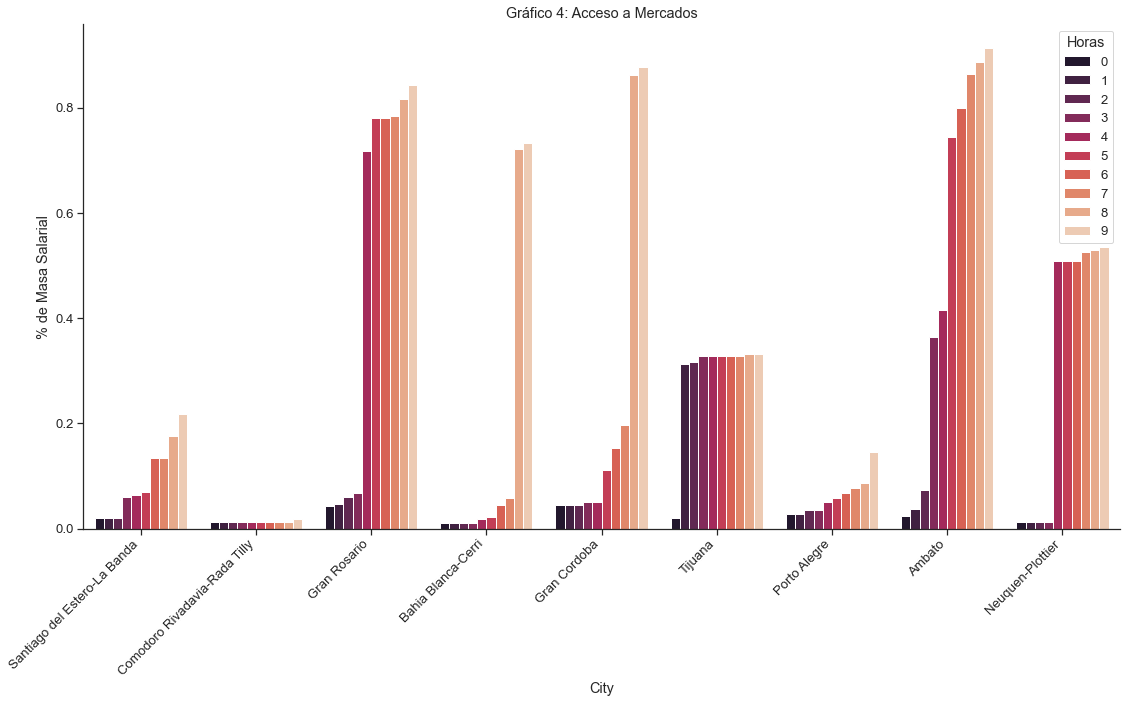

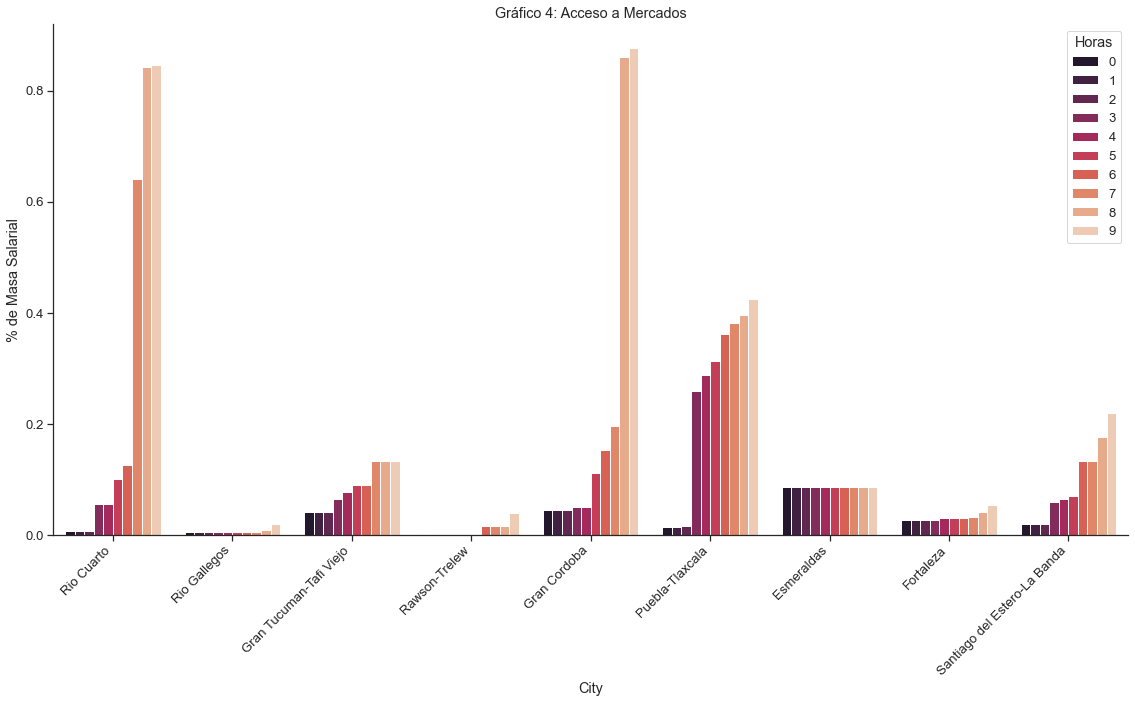

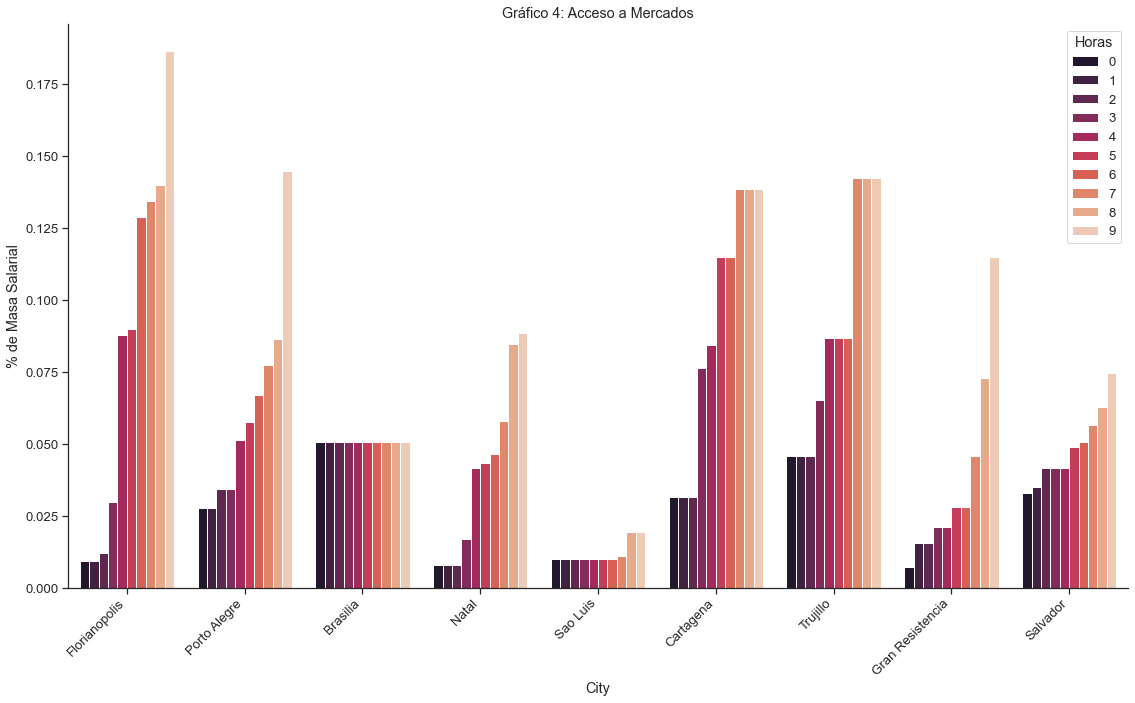

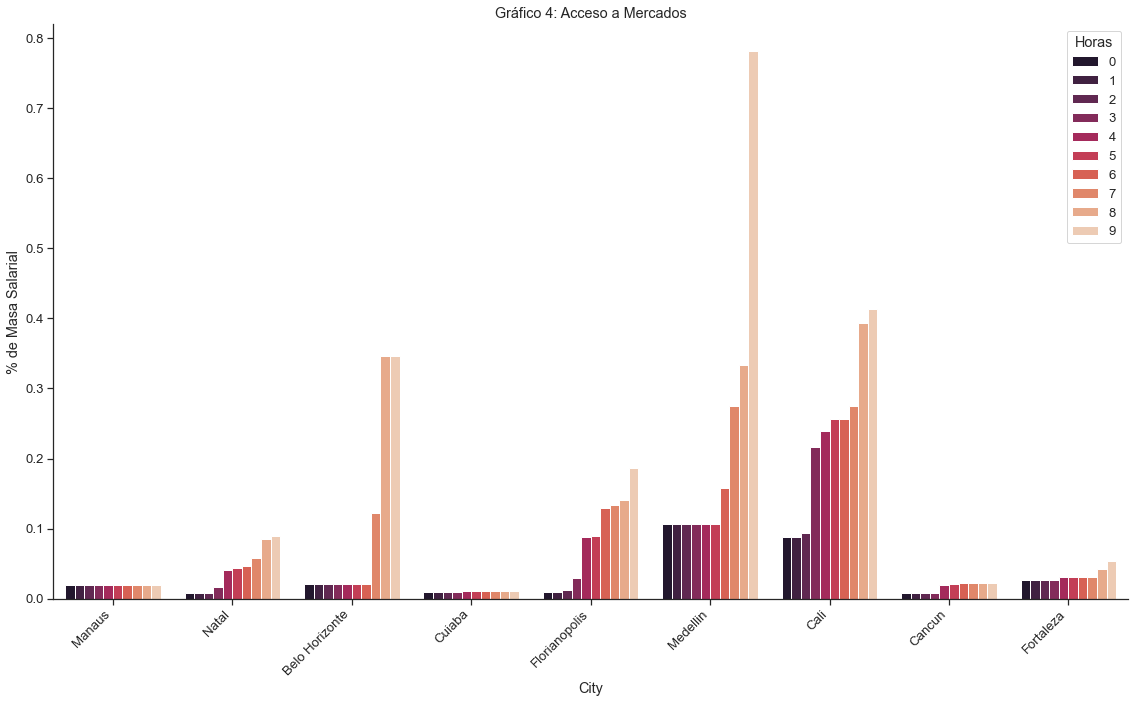

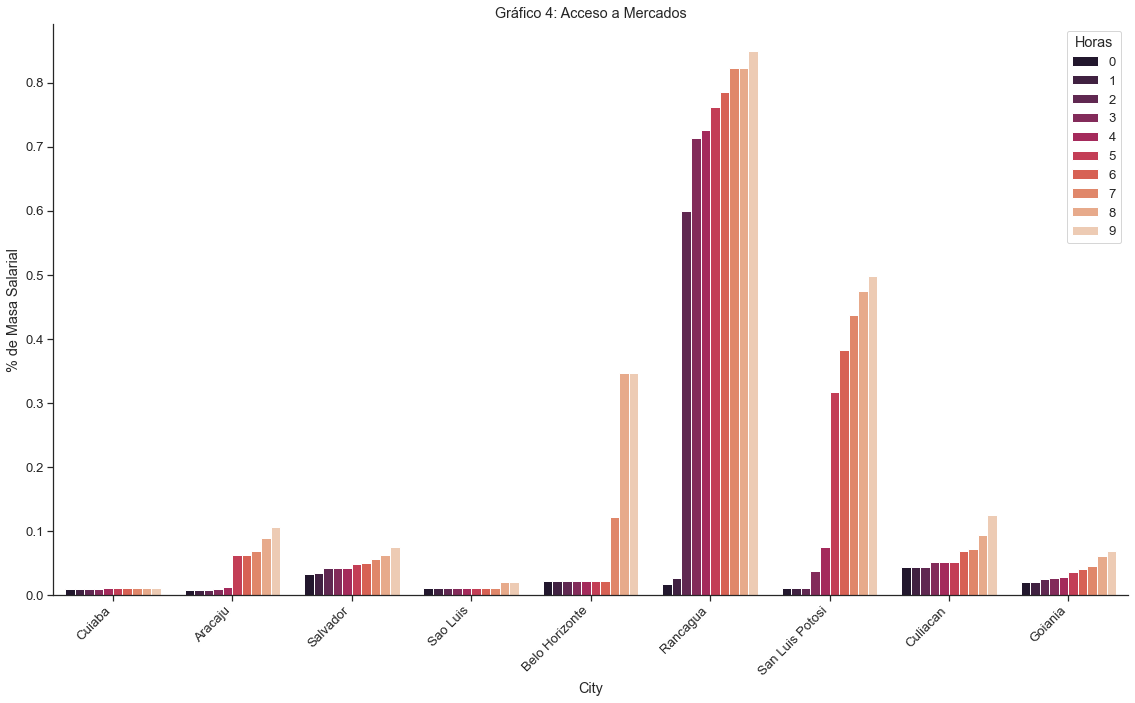

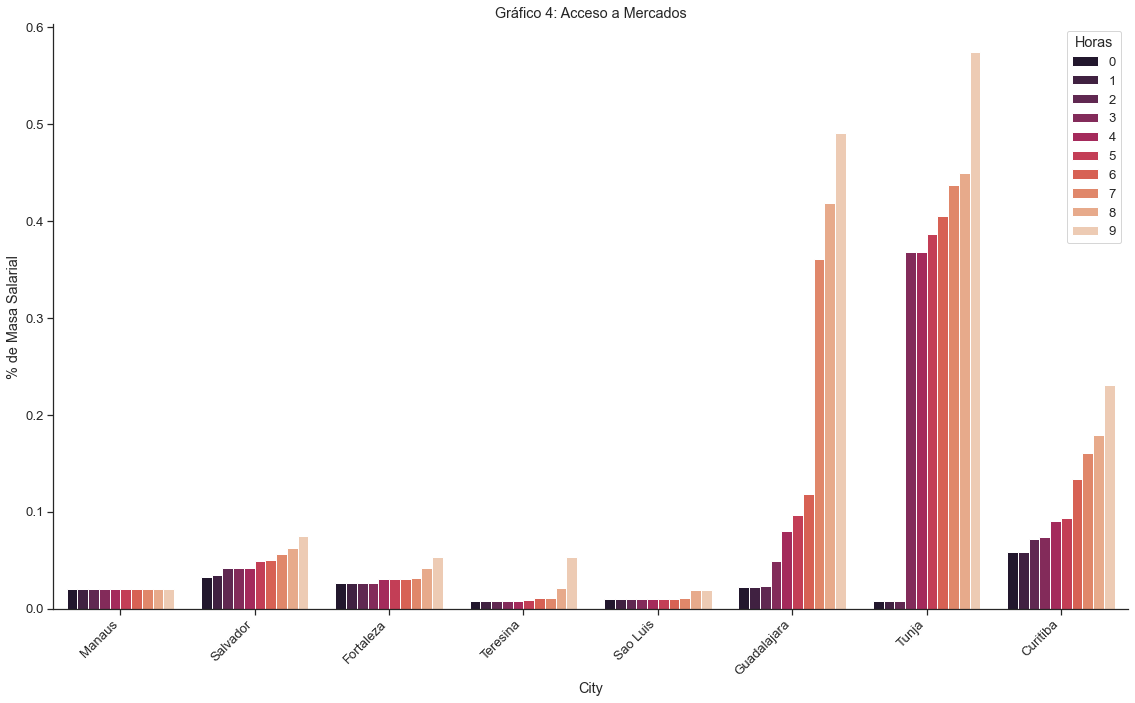

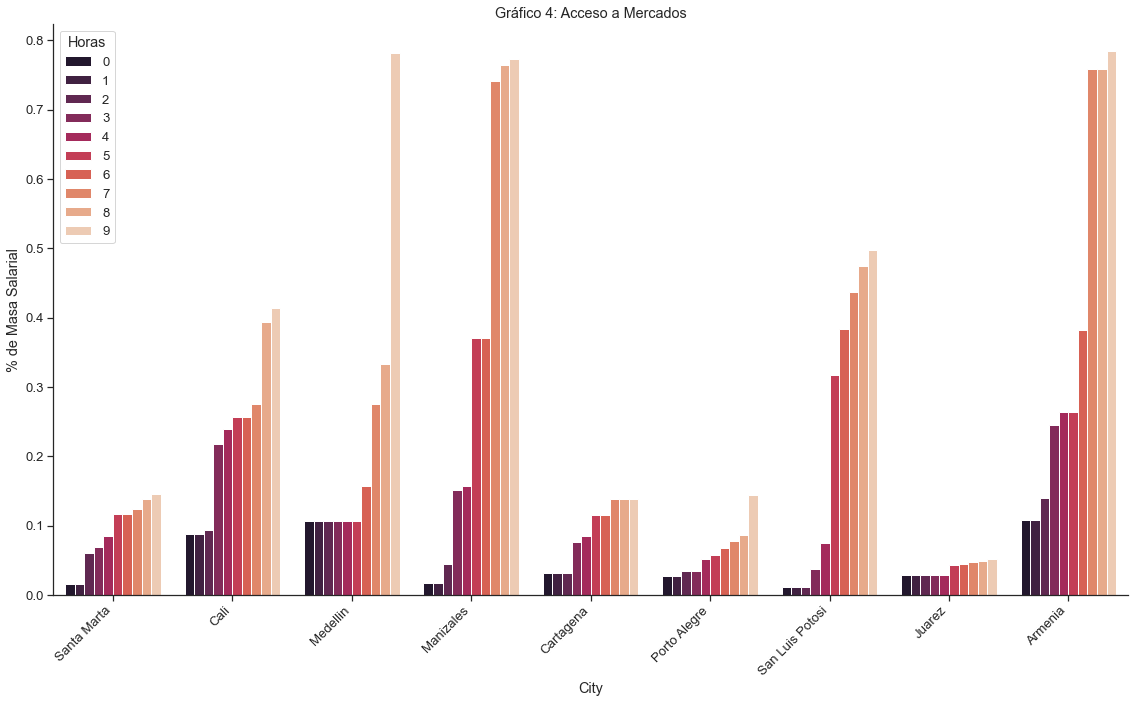

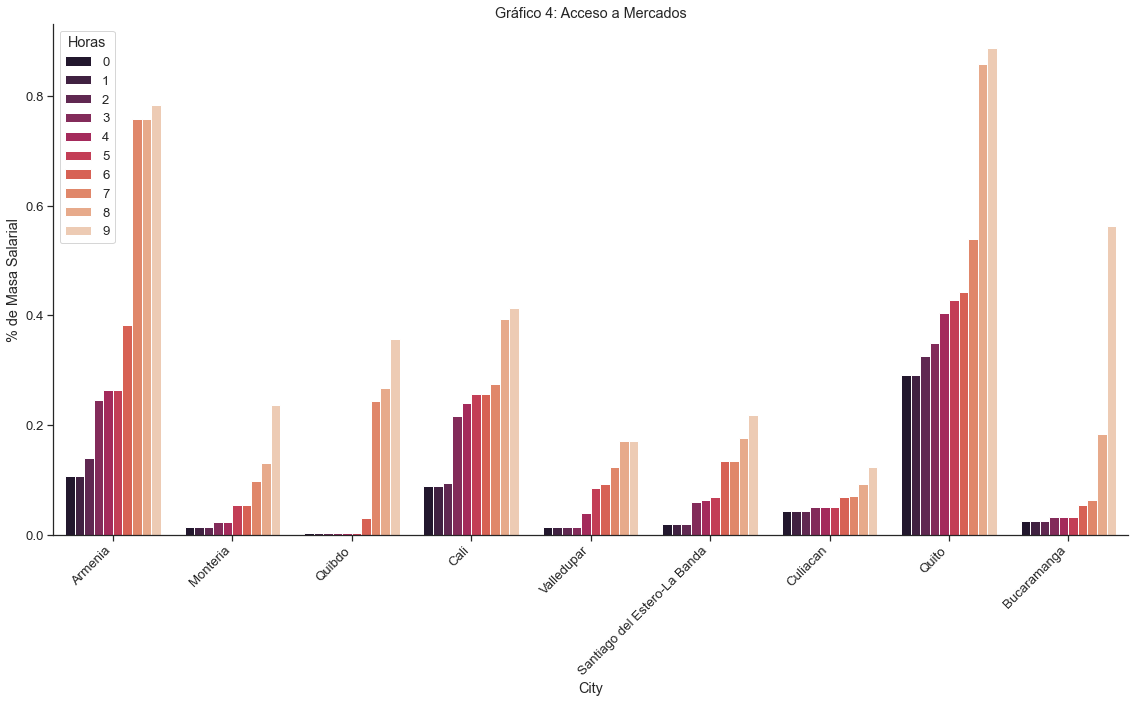

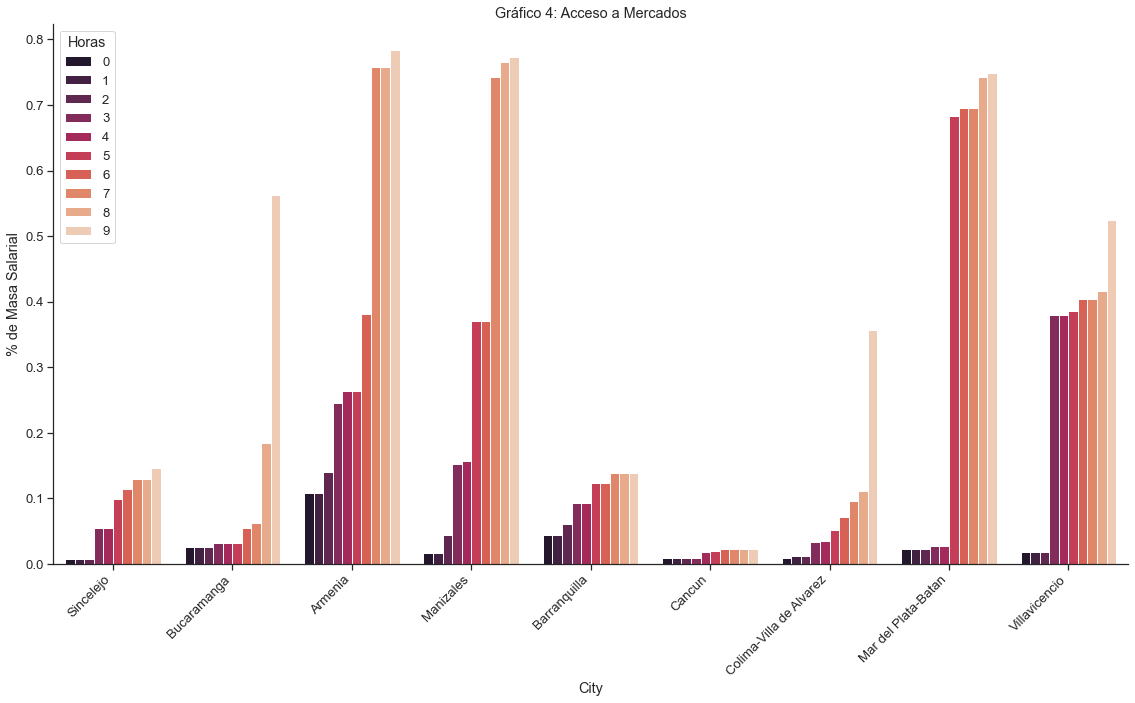

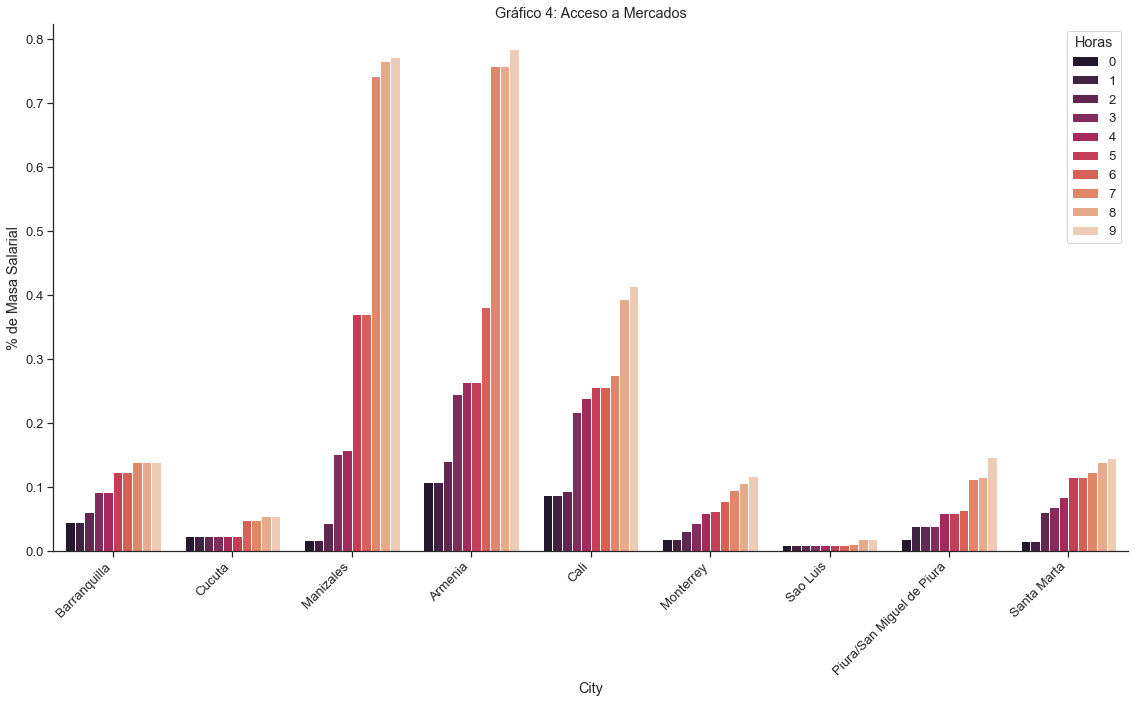

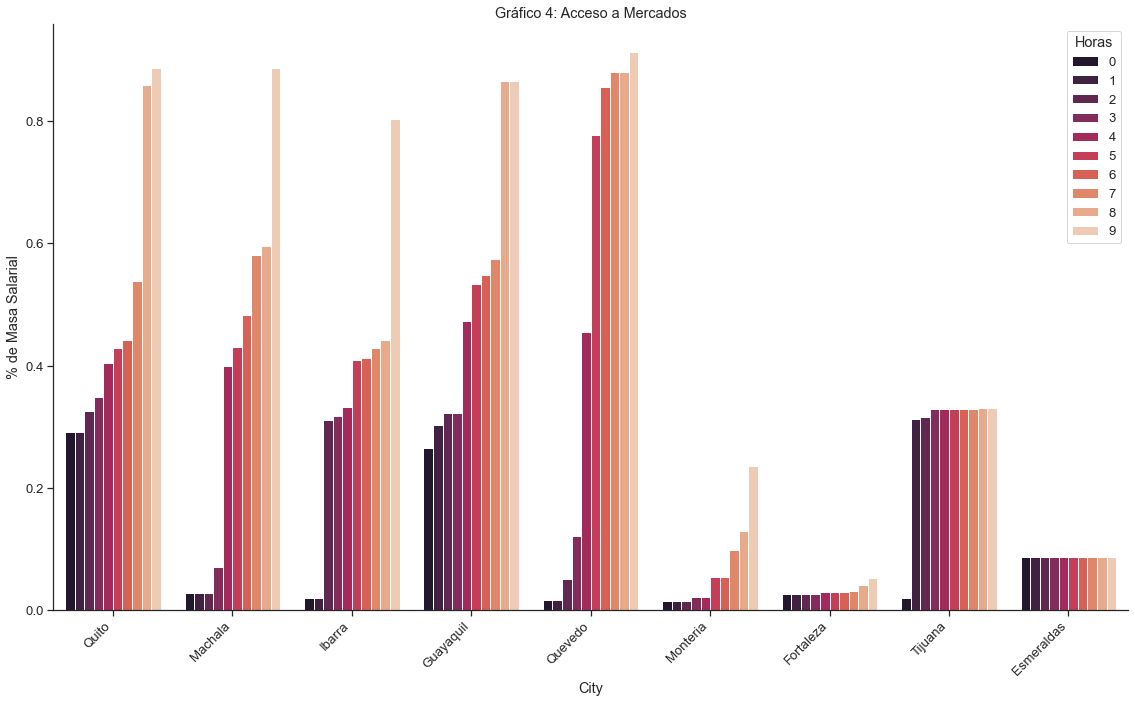

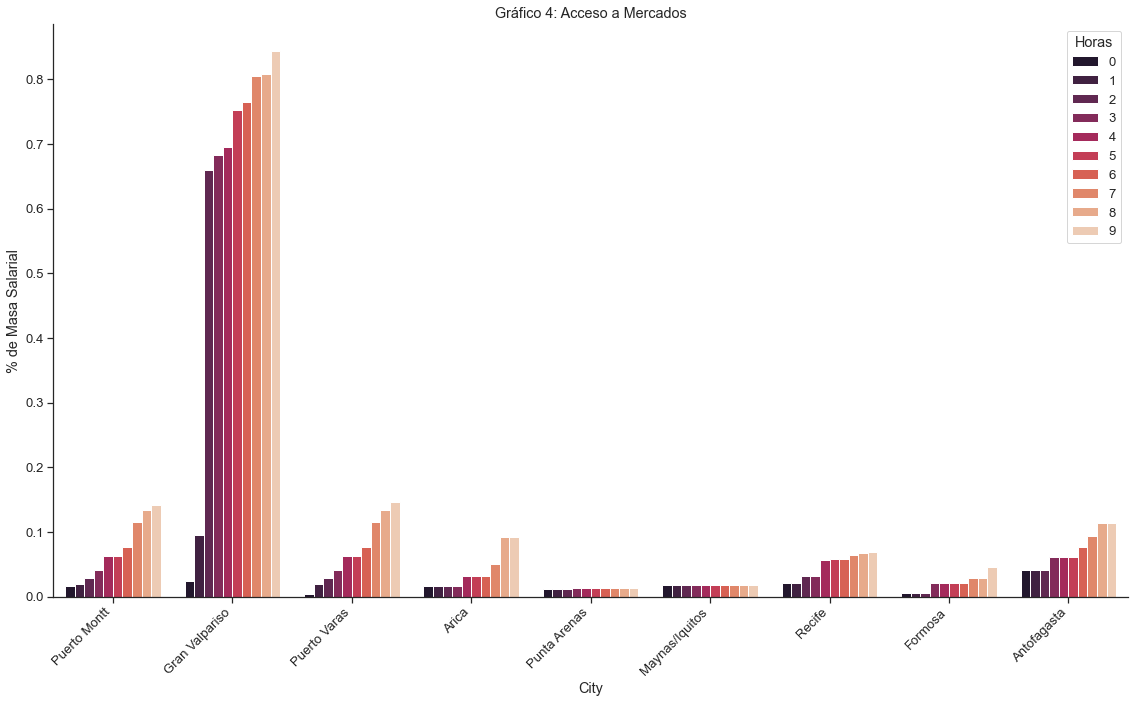

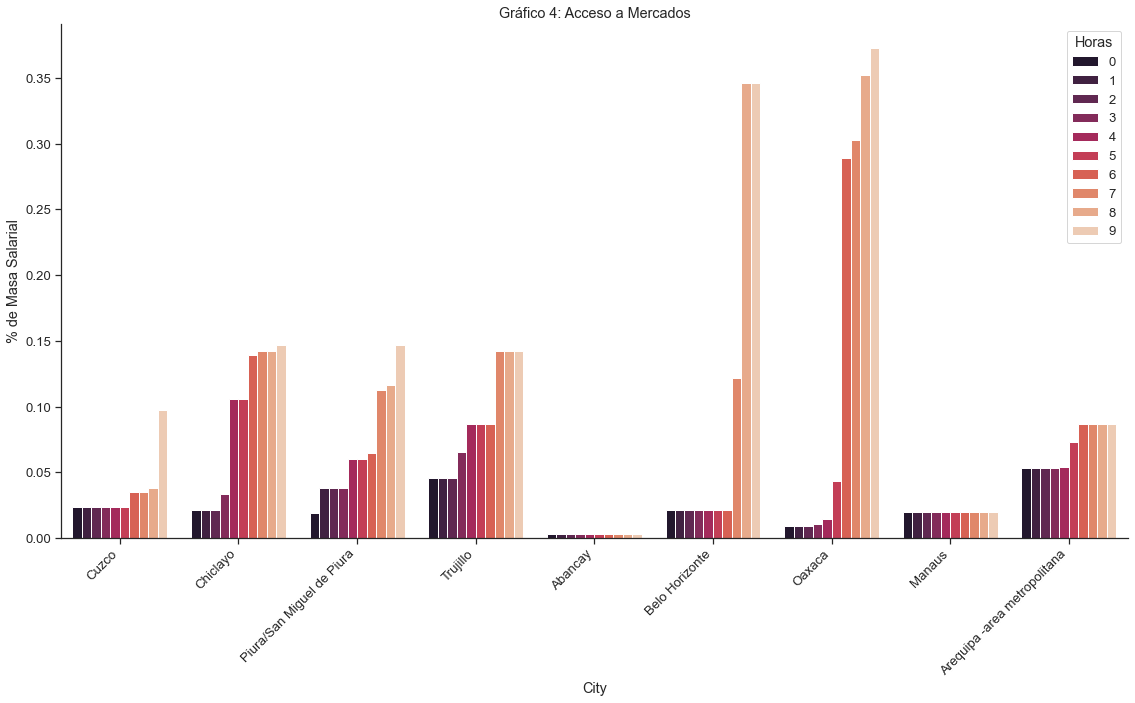

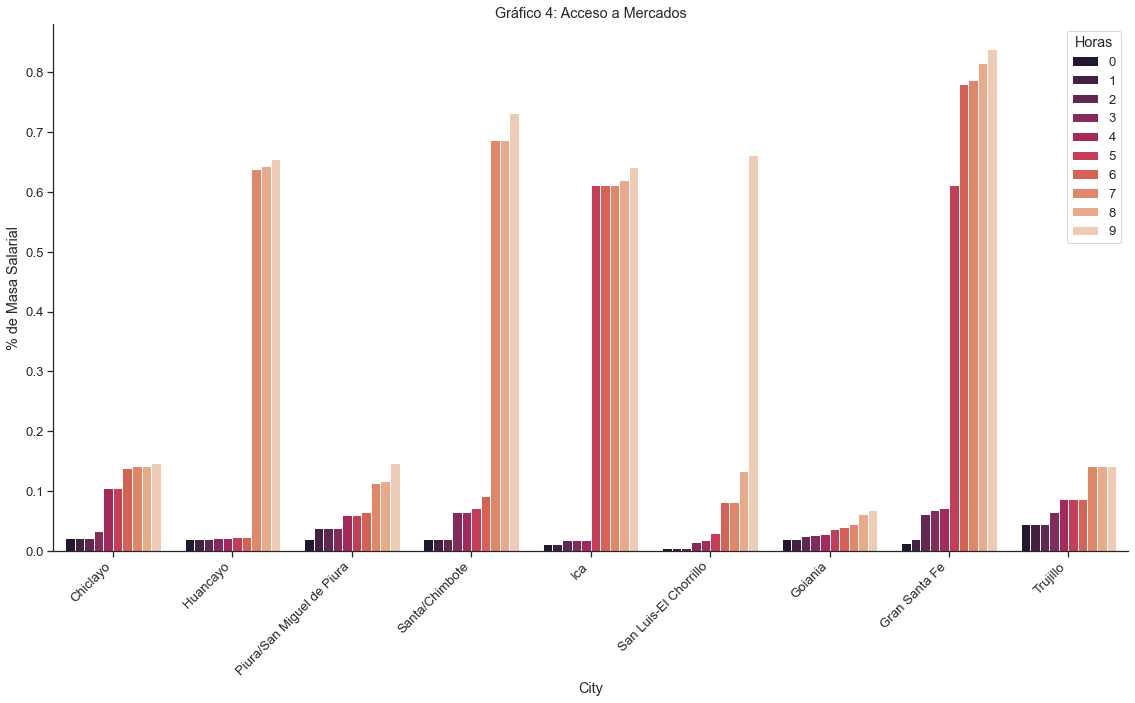

In [543]:
for k in muestra:
    #Loc en la df que necesito
    df = am.loc[muestra[k]].droplevel(0).drop(columns='index1')
    df = df.stack().to_frame().reset_index().replace(scdict).set_index('City').rename(columns={'level_1':'Horas',0:'% de Masa Salarial'})

    #Plot
    fig, ax = plt.subplots(figsize=(16,10)) 
    g = sns.barplot(x=df.index, y="% de Masa Salarial", hue='Horas', data=df , palette='rocket' , linewidth=1)

    g.set_title('Gráfico 4: Acceso a Mercados')
    g.set_xticklabels(df.index.unique().tolist() , rotation=45 , ha='right')

    sns.set(font_scale=1.2)
    sns.set_style("ticks")
    sns.despine()
    plt.tight_layout()
    plt.savefig('informes\\'+k+'\\images\\acceso.png',bbox_inches='tight')
    plt.close();

## Laboral

Recorto las bases

In [548]:
act = labor.loc[:,labor.columns[4:7].tolist()]

In [545]:
desempleo = labor[labor.columns[7:19]]

In [544]:
info = labor[labor.columns[1:4]]

In [575]:
dist = labor[labor.columns[19:24]]

In [547]:
edu = labor[labor.columns[24:]]

### Actividad

In [558]:
act['Diferencia Tasa A. Hombres - Tasa A. Mujeres'] = act['Tasa de Actividad Hombres'] - act['Tasa de Actividad Mujeres ']

In [572]:
for k in muestra:
    #Loc en la df que necesito
    df = act.loc[muestra[k]].droplevel(0).drop(columns=['Tasa de Actividad Hombres','Tasa de Actividad Mujeres ']).sort_values('Tasa de Actividad Total')
    df = df.stack().to_frame().reset_index().rename(columns={'level_1':'Sexo',0:'Tasa de Actividad'}).set_index('City')
    
    #Plot
    fig, ax = plt.subplots(figsize=(16,10)) 
    g = sns.barplot(x="Sexo", y="Tasa de Actividad", hue=df.index, data=df , palette='rocket' , linewidth=1)

    g.set_title('Gráfico 5: Tasa de Actividad y diferencia de tasas masculina y femenina')
    sns.set(font_scale=1.2)
    sns.set_style("ticks")
    sns.despine()
    plt.legend(bbox_to_anchor=(1.05,1.05), loc="upper right")
    plt.tight_layout()
    
    plt.savefig('informes\\'+k+"\\images\\actividad.png",bbox_inches='tight')
    plt.close();

Distribución de asalariados

In [577]:
dist.columns = ['Asalariados (Total)','Asalariados (Público)','Asalariados (Privado)','Patrón o Cuentapropista','Sin salario']

In [580]:
for k in muestra:
    #Loc en la df que necesito
    df = dist.loc[muestra[k]].droplevel(0).drop(columns=['Asalariados (Total)']).sort_values('Asalariados (Privado)')
    
    #Plot
    sns.set_palette('rocket')

    fig, ax = plt.subplots(1, 1,figsize=(12,6))

    df.plot(kind='bar', stacked=True , ax=ax , color=sns.color_palette() , width=0.9 , linewidth=0.001).set_title('Gráfico 6: Distribución de empleo (porcentajes)')

    fig.autofmt_xdate()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    
    plt.savefig('informes\\'+k+"\\images\\empleo_dist.png",bbox_inches='tight')
    plt.close();

Desempleo e informalidad

In [586]:
inf_des = info.loc[:,'% Asalariados Informales Total'].to_frame().join(desempleo.loc[:,'Tasa de Desempleo Total'])

In [594]:
inf_des.loc[('Mexico','Toluca')]

% Asalariados Informales Total   60.81
Tasa de Desempleo Total           4.22
Name: (Mexico, Toluca), dtype: float64

In [599]:
for k in muestra:
    #Loc en la df que necesito
    df = inf_des.loc[muestra[k],:].stack().reset_index().rename(columns={'level_2':'Variable',0:'Porcentaje'}).set_index(['Country','City']).droplevel(0).sort_values('City').sort_values(['Variable','Porcentaje'])
    
    #Plot
    fig, ax = plt.subplots(figsize=(16,10)) #,constrained_layout=True
    g = sns.barplot(x=df.index, y='Porcentaje', hue='Variable', data=df , palette='rocket' , linewidth=1)

    g.set_title('Gráfico 7: Tasas de desempleo e informalidad')
    #g.legend_.remove()
    g.set_xticklabels(df.index.unique().tolist() , rotation=45 , ha='right')

    sns.set(font_scale=1.2)
    sns.set_style("ticks")
    sns.despine()
    plt.legend(bbox_to_anchor=(1.05,1.05), loc="upper right")
    plt.tight_layout()
    
    plt.savefig('informes\\'+k+"\\images\\inf_des.png",bbox_inches='tight')
    plt.close();

Desempleo Etario

In [603]:
des = desempleo.loc[:,['Tasa de Desempleo 15-24','Tasa de Desempleo 25-54','Tasa de Desempleo 55 (+)']]

In [616]:
for k in muestra:
    #Loc en la df que necesito
    df = des.loc[muestra[k],:].stack().reset_index().rename(columns={'level_2':'Rango Etario',0:'Porcentaje'}).set_index(['Country','City']).droplevel(0)
    
    #Plot
    fig, ax = plt.subplots(figsize=(16,10))
    g = sns.barplot(x=df.index, y='Porcentaje', hue='Rango Etario', data=df , palette='rocket' , linewidth=1)

    g.set_title('Gráfico 8: Tasas de desempleo según rango etario')
    #g.legend_.remove()
    g.set_xticklabels(df.index.unique().tolist() , rotation=45 , ha='right')

    sns.set(font_scale=1.2)
    sns.set_style("ticks")
    sns.despine()
    plt.legend(bbox_to_anchor=(1.05,1.05), loc="upper right")
    plt.tight_layout()

    plt.savefig('informes\\'+k+"\\images\\des_etario.png",bbox_inches='tight')
    plt.close();

Educación

Secundario vs superior

In [620]:
edus = edu.loc[:,['% población con secundario completo Total','% población con superior completo Total']]

In [624]:
for k in muestra:
    #Loc en la df que necesito
    df = edus.loc[muestra[k],:].droplevel(0).sort_values('% población con secundario completo Total')
    
    #Plot    
    fig, ax = plt.subplots(1, 2,figsize=(18,8))

    sns.barplot(x=df.index, y='% población con secundario completo Total', data=df, ax=ax[0], palette='rocket').set_title('Gráfico 9: % población con secundario terminado')
    sns.barplot(x=df.index, y='% población con superior completo Total', data=df, ax=ax[1], palette='rocket').set_title('Gráfico 10: % población con superior terminado')

    fig.autofmt_xdate()

    sns.set(font_scale=1.2)
    sns.set_style("ticks")
    sns.despine()

    plt.tight_layout()
    custom_ylim = (0, 50)
    plt.setp(ax,  ylim=custom_ylim)
    
    plt.savefig('informes\\'+k+"\\images\\edu_secundaria.png",bbox_inches='tight')
    plt.close();

Superior

In [720]:
edu.columns

Index(['% población con secundario completo Total',
       '% población con secundario completo Mujeres',
       '% población con secundario completo Hombres',
       '% población con secundario completo 20 a 25 años de edad',
       '% población con secundario completo % población 18-25 años  que se encuentra estudiando nivel superior o terciario',
       '% población con superior completo Total',
       '% población con superior completo Mujeres',
       '% población con superior completo Hombres',
       '% población con superior completo 25 a 35 años de edad'],
      dtype='object')

In [721]:
edus = edu.loc[:,['% población con secundario completo % población 18-25 años  que se encuentra estudiando nivel superior o terciario','% población con superior completo 25 a 35 años de edad']]

In [722]:
edus.columns = ['% población 18-25 años que se encuentra estudiando nivel superior o terciario','% población con superior completo 25 a 35 años de edad']

In [723]:
edus = edus[['% población con superior completo 25 a 35 años de edad','% población 18-25 años que se encuentra estudiando nivel superior o terciario']]

In [724]:
for k in muestra:
    #Loc en la df que necesito
    df = edus.loc[muestra[k],:].droplevel(0).sort_values('% población con superior completo 25 a 35 años de edad').stack().reset_index().set_index('City').rename(columns={'level_1':'Grupo',0:'Porcentaje'})
    
    #Plot
    fig, ax = plt.subplots(figsize=(16,10))
    g = sns.barplot(x=df.index, y='Porcentaje', hue='Grupo', data=df , palette='rocket' , linewidth=1)

    g.set_title('Gráfico 11: Educación superior')
    g.set_xticklabels(df.index.unique().tolist() , rotation=45 , ha='right')

    sns.set(font_scale=1.2)
    sns.set_style("ticks")
    sns.despine()
    #plt.legend(bbox_to_anchor=(1.05,1.05), loc="upper right")
    plt.tight_layout()
    
    plt.savefig("informes\\"+k+"\\images\\edu_superior.png",bbox_inches='tight')
    plt.close();

## Sectores económicos

In [649]:
hh = sec.loc[:,['HHc/HHp','HH','Hhpais']].join(labor.loc[:,'Salario Horario (PPP 2011)']).rename(columns={'HH':'Índice HH','HHc/HHp':'Índice HH / Índice HH país'})
#.join(ta.loc['Colombia',ta.columns[33:36].tolist()].idxmax(axis=1).to_frame().rename(columns={0:'Principal Sector (3 principales)'}))

In [646]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.005, point['y'], str(point['val']))

In [654]:
for k in muestra:
    #Loc en la df que necesito
    df = hh.loc[muestra[k],:].droplevel(0).reset_index()
    
    #Plot
    fig, ax = plt.subplots(figsize=(11,8))

    sns.scatterplot(data=df, x="Índice HH / Índice HH país", y='Salario Horario (PPP 2011)' , ax=ax  , s=125 , palette='rocket').set_title('Gráfico 12: Índice HH (ratio País) vs Salario Horario en USD')

    #plt.legend(bbox_to_anchor=(0.95,0.95), loc="upper right")
    plt.tight_layout()
    sns.set(font_scale=1.0)
    sns.set_style("ticks")
    sns.despine()
    plt.axvline(x=1,linestyle='--')

    label_point( df["Índice HH / Índice HH país"] , df['Salario Horario (PPP 2011)'] , df['City'] , plt.gca())
    
    plt.savefig('informes\\'+k+'\\images\\hh_salario.png',bbox_inches='tight')
    plt.close();

Salarios vs MS vs Empleo

In [682]:
ms = sec.iloc[:,31:41]
empleo = sec.iloc[:,10:20]
salario = sec.iloc[:,0:10]

In [683]:
name = ms.columns.tolist()

emp = empleo.columns.tolist()
mydictb = dict(zip(emp,name))
empleo = empleo.rename(columns=mydictb)

sal = salario.columns.tolist()
mydictc = dict(zip(sal,name))
salario = salario.rename(columns=mydictc)

In [692]:
for k in muestra:
    #Loc en la dfs que necesito

    empleo_plot = empleo.loc[muestra[k],:].droplevel(0).stack().reset_index().rename(columns={'level_1':'sector',0:'Proporción de empleo'}).set_index('City')
    ms_plot = ms.loc[muestra[k],:].droplevel(0).stack().reset_index().rename(columns={'level_1':'sector',0:'Proporción de masa salarial'}).set_index('City')
    salario_plot = salario.loc[muestra[k],:].droplevel(0).stack().reset_index().rename(columns={'level_1':'sector',0:'Salario Promedio Horario en USD'}).set_index('City')

    #Plot
    fig, ax = plt.subplots(3,1,figsize=(16,25))
    
    sns.barplot(x=empleo_plot.index, y="Proporción de empleo", hue='sector', data=empleo_plot , ax = ax[0], palette='rocket').set_title('Gráfico 13: Proporción de empleo de cada sector ')
    sns.barplot(x=ms_plot.index, y="Proporción de masa salarial", hue='sector', data=ms_plot , ax = ax[1], palette='rocket').set_title('Gráfico 14: Proporción de masa salarial de cada sector')
    sns.barplot(x=salario_plot.index, y="Salario Promedio Horario en USD", hue='sector', data=salario_plot , ax = ax[2], palette='rocket').set_title('Gráfico 15: Salario de cada sector')

    ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax[0].set_xticklabels(empleo_plot.index.unique().tolist() , rotation=45 , ha='right')
    ax[1].set_xticklabels(ms_plot.index.unique().tolist() , rotation=45 , ha='right')
    ax[2].set_xticklabels(salario_plot.index.unique().tolist() , rotation=45 , ha='right')

    sns.set(font_scale=1.2)
    sns.set_style("ticks")
    sns.despine()
    plt.tight_layout()

    plt.savefig('informes\\'+k+'\\images\\ms_vs_empleo.png',bbox_inches='tight')
    plt.close();

## Copiar Informe en todos los dirs

In [693]:
import shutil

In [695]:
direc

'c:\\Users\\Franco\\Python\\CAF\\files\\clean'

In [712]:
inf = 'C:\\Users\\Franco\\Python\\CAF\\Entregables\\Informes\\multiples\\informes\\Antofagasta\\informe_antofagasta.ipynb'

In [713]:
direcs = os.listdir('informes')

In [718]:
direcs = direcs[1:]

In [719]:
for d in direcs:
    shutil.copy(inf,"C:\\Users\\Franco\\Python\\CAF\\Entregables\\Informes\\multiples\\informes\\"+d)